In [1]:
import os
import pandas as pd

# List of file paths for the three datasets
dataset_paths = [
    r"C:\Users\kevin\OneDrive\Desktop\code_fixed\Optimal-timing-for-bandwith-reservation-main\optimal_timing_for_bandwidth_reservation\datasets\Dataset_NO1.csv",
    r"C:\Users\kevin\OneDrive\Desktop\code_fixed\Optimal-timing-for-bandwith-reservation-main\optimal_timing_for_bandwidth_reservation\datasets\Dataset_NO2.csv",
    r"C:\Users\kevin\OneDrive\Desktop\code_fixed\Optimal-timing-for-bandwith-reservation-main\optimal_timing_for_bandwidth_reservation\datasets\Dataset_NO3.csv",
]

# Load and print the first 5 rows with headers for each dataset
for dataset_path in dataset_paths:
    # Load the dataset
    df = pd.read_csv(dataset_path)

    # Print the first 5 rows with headers
    print(f"\nDataset: {os.path.basename(dataset_path)}")
    print(df.head())



Dataset: Dataset_NO1.csv
                        Date Instance Type      Region   Price
0  2017-05-08 21:45:35+00:00    r3.2xlarge  us-west-1c  0.1763
1  2017-05-08 21:45:22+00:00    g2.2xlarge  us-west-1b  0.2302
2  2017-05-08 21:45:22+00:00    g2.2xlarge  us-west-1c  0.2214
3  2017-05-08 21:45:21+00:00   m4.16xlarge  us-west-1c  0.7510
4  2017-05-08 21:45:18+00:00    c3.8xlarge  us-west-1c  0.2952

Dataset: Dataset_NO2.csv
                        Date Instance Type      Region   Price
0  2017-05-08 21:45:45+00:00    c3.4xlarge  us-west-1b  0.5022
1  2017-05-08 21:45:29+00:00    c4.8xlarge  us-west-1b  1.6136
2  2017-05-08 21:45:27+00:00    c3.8xlarge  us-west-1b  1.0150
3  2017-05-08 21:45:27+00:00    c3.8xlarge  us-west-1c  1.0038
4  2017-05-08 21:45:26+00:00     m2.xlarge  us-west-1c  0.0995

Dataset: Dataset_NO3.csv
                        Date Instance Type      Region   Price
0  2017-05-08 21:45:35+00:00    r3.2xlarge  us-west-1c  0.2763
1  2017-05-08 21:45:22+00:00    g2.2xlar

C:\Users\kevin\AppData\Local\Temp\ipykernel_28336\2500598513.py:32: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_resampled = df.resample(plot_interval).mean()  # Use mean for multiple entries on the same date
C:\Users\kevin\AppData\Local\Temp\ipykernel_28336\2500598513.py:32: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_resampled = df.resample(plot_interval).mean()  # Use mean for multiple entries on the same date
C:\Users\kevin\AppData\Local\Temp\ipykernel_28336\2500598513.py:32: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_on

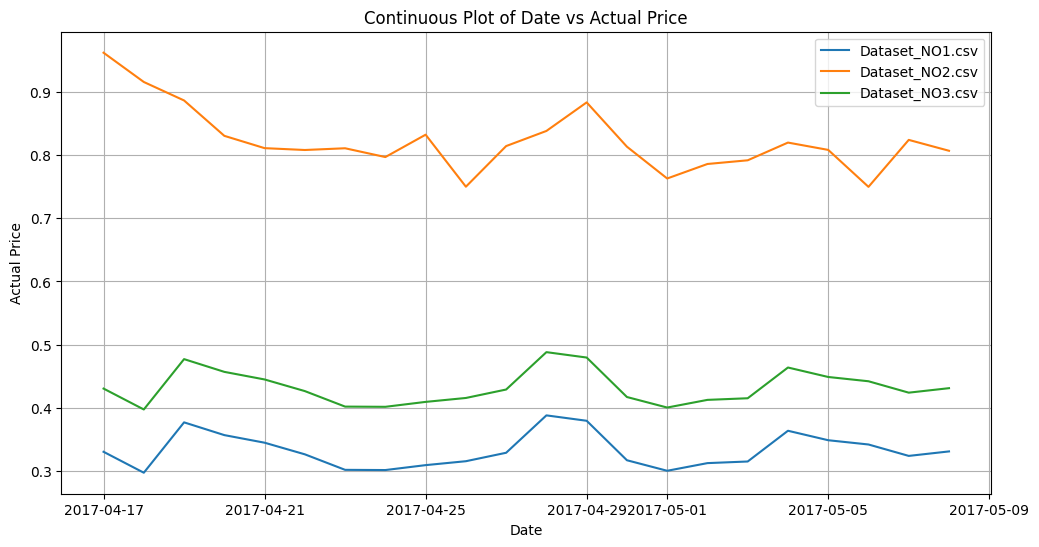

In [4]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# List of file paths for the three datasets
dataset_paths = [
    r"C:\Users\kevin\OneDrive\Desktop\code_fixed\Optimal-timing-for-bandwith-reservation-main\optimal_timing_for_bandwidth_reservation\datasets\Dataset_NO1.csv",
    r"C:\Users\kevin\OneDrive\Desktop\code_fixed\Optimal-timing-for-bandwith-reservation-main\optimal_timing_for_bandwidth_reservation\datasets\Dataset_NO2.csv",
    r"C:\Users\kevin\OneDrive\Desktop\code_fixed\Optimal-timing-for-bandwith-reservation-main\optimal_timing_for_bandwidth_reservation\datasets\Dataset_NO3.csv",
]

# Set the interval for plotting (e.g., daily, hourly)
plot_interval = 'D'  # Daily interval, change as needed

# Initialize the plot
plt.figure(figsize=(12, 6))
plt.title("Continuous Plot of Date vs Actual Price")

# Plot Date vs Actual Price for each dataset
for dataset_path in dataset_paths:
    # Load the dataset
    df = pd.read_csv(dataset_path)

    # Convert 'Date' column to datetime if not already
    df['Date'] = pd.to_datetime(df['Date'])

    # Set 'Date' as the index
    df.set_index('Date', inplace=True)

    # Resample the data at the specified interval and plot
    df_resampled = df.resample(plot_interval).mean()  # Use mean for multiple entries on the same date
    plt.plot(df_resampled.index, df_resampled['Price'], label=os.path.basename(dataset_path))

# Customize the plot
plt.xlabel("Date")
plt.ylabel("Actual Price")
plt.legend()
plt.grid(True)
plt.show()


In [2]:
import os
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# List of file paths for the three datasets
dataset_paths = [
    r"C:\Users\kevin\OneDrive\Desktop\code_fixed\Optimal-timing-for-bandwith-reservation-main\optimal_timing_for_bandwidth_reservation\datasets\Dataset_NO1.csv",
    r"C:\Users\kevin\OneDrive\Desktop\code_fixed\Optimal-timing-for-bandwith-reservation-main\optimal_timing_for_bandwidth_reservation\datasets\Dataset_NO2.csv",
    r"C:\Users\kevin\OneDrive\Desktop\code_fixed\Optimal-timing-for-bandwith-reservation-main\optimal_timing_for_bandwidth_reservation\datasets\Dataset_NO3.csv",
]

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Normalize the 'Price' column in each dataset
for dataset_path in dataset_paths:
    # Load the dataset
    df = pd.read_csv(dataset_path)

    # Extract the 'Price' column for normalization
    prices = df['Price'].values.reshape(-1, 1)

    # Fit and transform the scaler on 'Price'
    normalized_prices = scaler.fit_transform(prices)

    # Update the 'Price' column in the DataFrame with normalized values
    df['Price'] = normalized_prices

    # Print the first 5 rows with normalized 'Price' column
    print(f"\nDataset: {os.path.basename(dataset_path)} (Normalized Prices)")
    print(df.head())

    # Save the normalized dataset to a new CSV file if needed
    # df.to_csv(os.path.splitext(dataset_path)[0] + '_normalized.csv', index=False)



Dataset: Dataset_NO1.csv (Normalized Prices)
                        Date Instance Type      Region     Price
0  2017-05-08 21:45:35+00:00    r3.2xlarge  us-west-1c  0.002768
1  2017-05-08 21:45:22+00:00    g2.2xlarge  us-west-1b  0.003631
2  2017-05-08 21:45:22+00:00    g2.2xlarge  us-west-1c  0.003490
3  2017-05-08 21:45:21+00:00   m4.16xlarge  us-west-1c  0.011964
4  2017-05-08 21:45:18+00:00    c3.8xlarge  us-west-1c  0.004671

Dataset: Dataset_NO2.csv (Normalized Prices)
                        Date Instance Type      Region     Price
0  2017-05-08 21:45:45+00:00    c3.4xlarge  us-west-1b  0.005873
1  2017-05-08 21:45:29+00:00    c4.8xlarge  us-west-1b  0.019030
2  2017-05-08 21:45:27+00:00    c3.8xlarge  us-west-1b  0.011943
3  2017-05-08 21:45:27+00:00    c3.8xlarge  us-west-1c  0.011811
4  2017-05-08 21:45:26+00:00     m2.xlarge  us-west-1c  0.001106

Dataset: Dataset_NO3.csv (Normalized Prices)
                        Date Instance Type      Region     Price
0  2017-05-08 21:

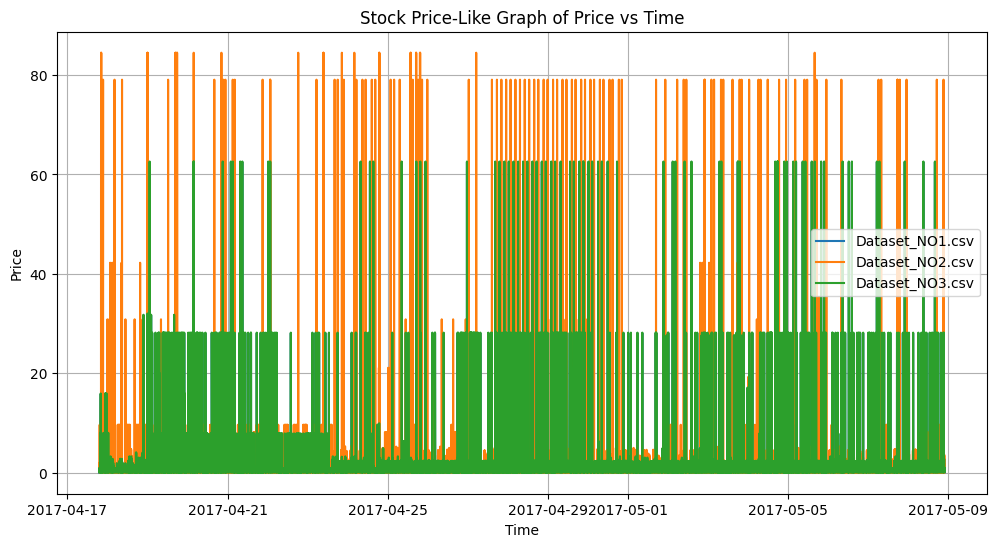

In [10]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# List of file paths for the three datasets
dataset_paths = [
    r"C:\Users\kevin\OneDrive\Desktop\code_fixed\Optimal-timing-for-bandwith-reservation-main\optimal_timing_for_bandwidth_reservation\datasets\Dataset_NO1.csv",
    r"C:\Users\kevin\OneDrive\Desktop\code_fixed\Optimal-timing-for-bandwith-reservation-main\optimal_timing_for_bandwidth_reservation\datasets\Dataset_NO2.csv",
    r"C:\Users\kevin\OneDrive\Desktop\code_fixed\Optimal-timing-for-bandwith-reservation-main\optimal_timing_for_bandwidth_reservation\datasets\Dataset_NO3.csv",
]

# Initialize the plot
plt.figure(figsize=(12, 6))
plt.title("Stock Price-Like Graph of Price vs Time")

# Plot Stock Price-Like Graph of Price vs Time for each dataset
for dataset_path in dataset_paths:
    # Load the dataset
    df = pd.read_csv(dataset_path)

    # Convert 'Date' column to datetime if not already
    df['Date'] = pd.to_datetime(df['Date'])

    # Sort the DataFrame by 'Date' for a continuous curve
    df.sort_values(by='Date', inplace=True)

    # Plot Stock Price-Like Graph
    plt.plot(df['Date'], df['Price'], label=os.path.basename(dataset_path))

# Customize the plot
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()


C:\Users\kevin\AppData\Local\Temp\ipykernel_28336\1471320463.py:32: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_resampled = df.resample(plot_interval).mean()  # Use mean for multiple entries on the same date
C:\Users\kevin\AppData\Local\Temp\ipykernel_28336\1471320463.py:32: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_resampled = df.resample(plot_interval).mean()  # Use mean for multiple entries on the same date
C:\Users\kevin\AppData\Local\Temp\ipykernel_28336\1471320463.py:32: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_on

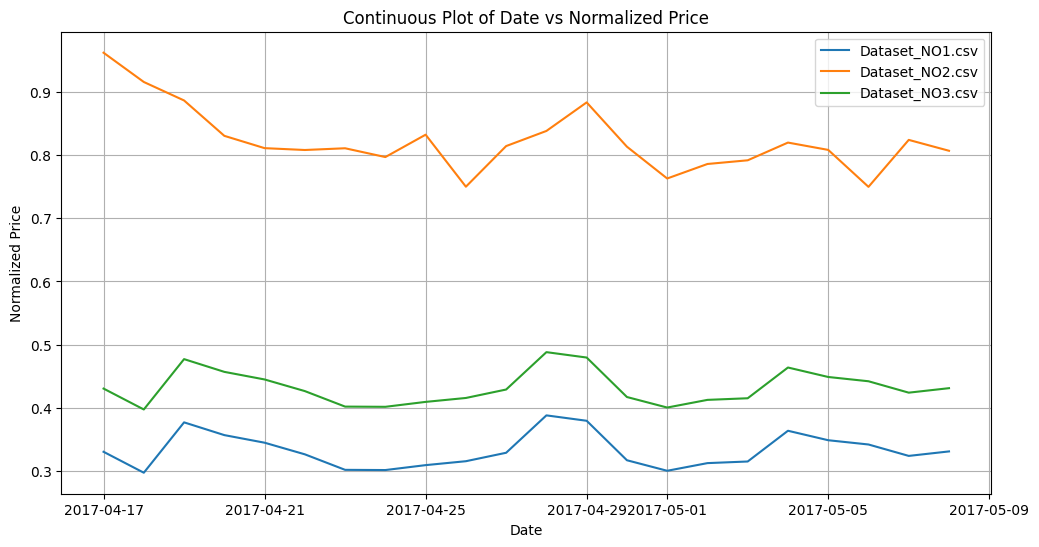

In [3]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# List of file paths for the three datasets
dataset_paths = [
    r"C:\Users\kevin\OneDrive\Desktop\code_fixed\Optimal-timing-for-bandwith-reservation-main\optimal_timing_for_bandwidth_reservation\datasets\Dataset_NO1.csv",
    r"C:\Users\kevin\OneDrive\Desktop\code_fixed\Optimal-timing-for-bandwith-reservation-main\optimal_timing_for_bandwidth_reservation\datasets\Dataset_NO2.csv",
    r"C:\Users\kevin\OneDrive\Desktop\code_fixed\Optimal-timing-for-bandwith-reservation-main\optimal_timing_for_bandwidth_reservation\datasets\Dataset_NO3.csv",
]

# Set the interval for plotting (e.g., daily, hourly)
plot_interval = 'D'  # Daily interval, change as needed

# Initialize the plot
plt.figure(figsize=(12, 6))
plt.title("Continuous Plot of Date vs Normalized Price")

# Plot Date vs Price for each dataset
for dataset_path in dataset_paths:
    # Load the dataset
    df = pd.read_csv(dataset_path)

    # Convert 'Date' column to datetime if not already
    df['Date'] = pd.to_datetime(df['Date'])

    # Set 'Date' as the index
    df.set_index('Date', inplace=True)

    # Resample the data at the specified interval and plot
    df_resampled = df.resample(plot_interval).mean()  # Use mean for multiple entries on the same date
    plt.plot(df_resampled.index, df_resampled['Price'], label=os.path.basename(dataset_path))

# Customize the plot
plt.xlabel("Date")
plt.ylabel("Normalized Price")
plt.legend()
plt.grid(True)
plt.show()


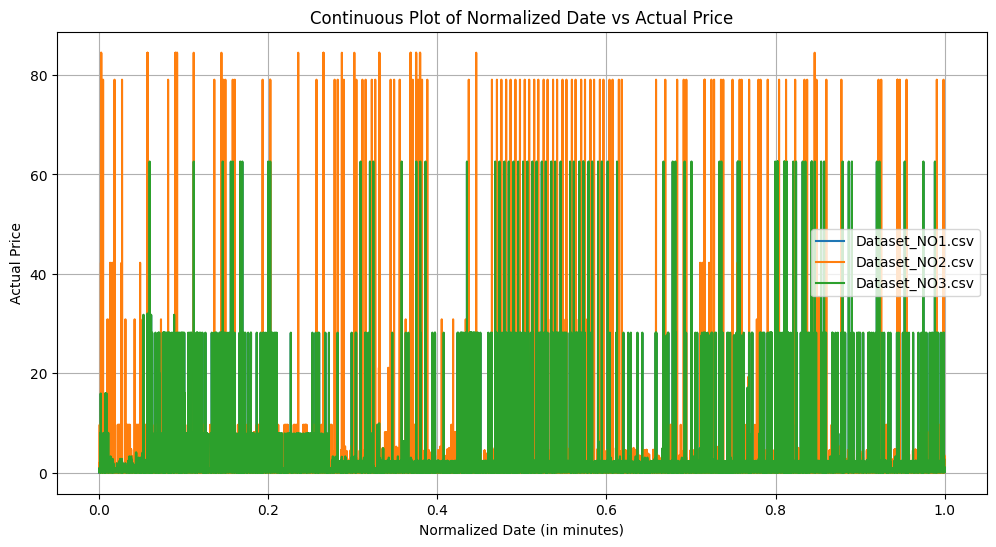

In [5]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

# List of file paths for the three datasets
dataset_paths = [
    r"C:\Users\kevin\OneDrive\Desktop\code_fixed\Optimal-timing-for-bandwith-reservation-main\optimal_timing_for_bandwidth_reservation\datasets\Dataset_NO1.csv",
    r"C:\Users\kevin\OneDrive\Desktop\code_fixed\Optimal-timing-for-bandwith-reservation-main\optimal_timing_for_bandwidth_reservation\datasets\Dataset_NO2.csv",
    r"C:\Users\kevin\OneDrive\Desktop\code_fixed\Optimal-timing-for-bandwith-reservation-main\optimal_timing_for_bandwidth_reservation\datasets\Dataset_NO3.csv",
]

# Initialize MinMaxScaler for 'Date' normalization
date_scaler = MinMaxScaler()

# Initialize the plot
plt.figure(figsize=(12, 6))
plt.title("Continuous Plot of Normalized Date vs Actual Price")

# Plot Normalized Date vs Actual Price for each dataset
for dataset_path in dataset_paths:
    # Load the dataset
    df = pd.read_csv(dataset_path)

    # Convert 'Date' column to datetime if not already
    df['Date'] = pd.to_datetime(df['Date'])

    # Normalize 'Date' to represent time in minutes
    df['Normalized_Date'] = date_scaler.fit_transform(df['Date'].values.reshape(-1, 1))

    # Plot Normalized Date vs Actual Price
    plt.plot(df['Normalized_Date'], df['Price'], label=os.path.basename(dataset_path))

# Customize the plot
plt.xlabel("Normalized Date (in minutes)")
plt.ylabel("Actual Price")
plt.legend()
plt.grid(True)
plt.show()


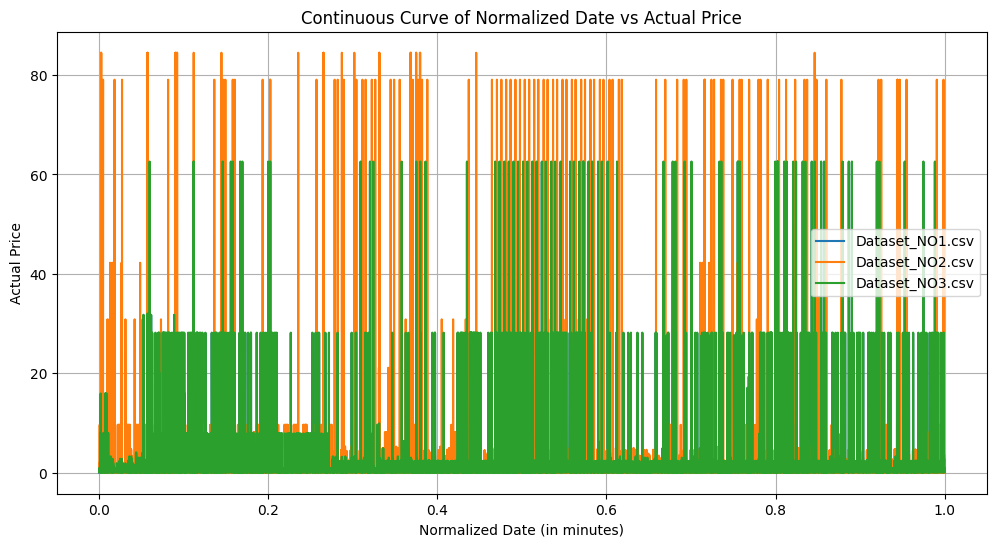

In [15]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

# List of file paths for the three datasets
dataset_paths = [
    r"C:\Users\kevin\OneDrive\Desktop\code_fixed\Optimal-timing-for-bandwith-reservation-main\optimal_timing_for_bandwidth_reservation\datasets\Dataset_NO1.csv",
    r"C:\Users\kevin\OneDrive\Desktop\code_fixed\Optimal-timing-for-bandwith-reservation-main\optimal_timing_for_bandwidth_reservation\datasets\Dataset_NO2.csv",
    r"C:\Users\kevin\OneDrive\Desktop\code_fixed\Optimal-timing-for-bandwith-reservation-main\optimal_timing_for_bandwidth_reservation\datasets\Dataset_NO3.csv",
]

# Initialize MinMaxScaler for 'Date' normalization
date_scaler = MinMaxScaler()

# Initialize the plot
plt.figure(figsize=(12, 6))
plt.title("Continuous Curve of Normalized Date vs Actual Price")

# Plot Continuous Curve of Normalized Date vs Actual Price for each dataset
for dataset_path in dataset_paths:
    # Load the dataset
    df = pd.read_csv(dataset_path)

    # Convert 'Date' column to datetime if not already
    df['Date'] = pd.to_datetime(df['Date'])

    # Normalize 'Date' to represent time in minutes
    df['Normalized_Date'] = date_scaler.fit_transform(df['Date'].values.reshape(-1, 1))

    # Sort the DataFrame by 'Normalized_Date' for a continuous curve
    df.sort_values(by='Normalized_Date', inplace=True)

    # Plot Continuous Curve
    plt.plot(df['Normalized_Date'], df['Price'], label=os.path.basename(dataset_path))

# Customize the plot
plt.xlabel("Normalized Date (in minutes)")
plt.ylabel("Actual Price")
plt.legend()
plt.grid(True)
plt.show()


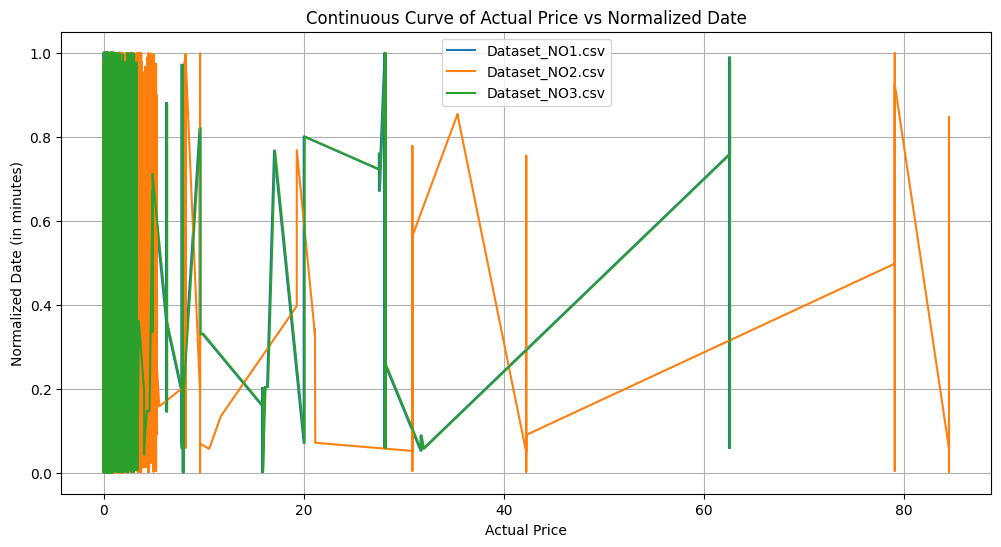

In [8]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

# List of file paths for the three datasets
dataset_paths = [
    r"C:\Users\kevin\OneDrive\Desktop\code_fixed\Optimal-timing-for-bandwith-reservation-main\optimal_timing_for_bandwidth_reservation\datasets\Dataset_NO1.csv",
    r"C:\Users\kevin\OneDrive\Desktop\code_fixed\Optimal-timing-for-bandwith-reservation-main\optimal_timing_for_bandwidth_reservation\datasets\Dataset_NO2.csv",
    r"C:\Users\kevin\OneDrive\Desktop\code_fixed\Optimal-timing-for-bandwith-reservation-main\optimal_timing_for_bandwidth_reservation\datasets\Dataset_NO3.csv",
]

# Initialize MinMaxScaler for 'Date' normalization
date_scaler = MinMaxScaler()

# Initialize the plot
plt.figure(figsize=(12, 6))
plt.title("Continuous Curve of Actual Price vs Normalized Date")

# Plot Continuous Curve of Actual Price vs Normalized Date for each dataset
for dataset_path in dataset_paths:
    # Load the dataset
    df = pd.read_csv(dataset_path)

    # Convert 'Date' column to datetime if not already
    df['Date'] = pd.to_datetime(df['Date'])

    # Normalize 'Date' to represent time in minutes
    df['Normalized_Date'] = date_scaler.fit_transform(df['Date'].values.reshape(-1, 1))

    # Sort the DataFrame by 'Price' for a continuous curve
    df.sort_values(by='Price', inplace=True)

    # Plot Continuous Curve
    plt.plot(df['Price'], df['Normalized_Date'], label=os.path.basename(dataset_path))

# Customize the plot
plt.xlabel("Actual Price")
plt.ylabel("Normalized Date (in minutes)")
plt.legend()
plt.grid(True)
plt.show()


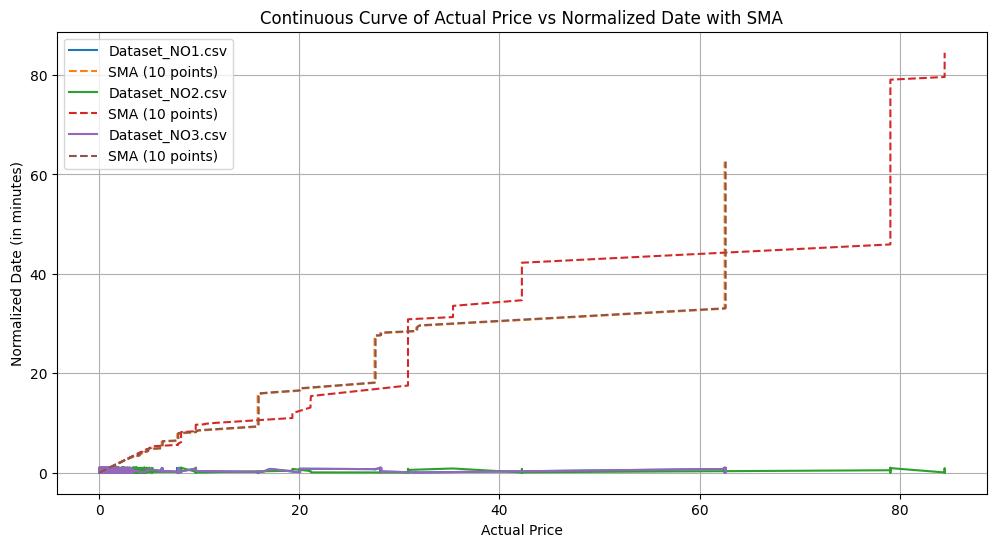

In [9]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

# List of file paths for the three datasets
dataset_paths = [
    r"C:\Users\kevin\OneDrive\Desktop\code_fixed\Optimal-timing-for-bandwith-reservation-main\optimal_timing_for_bandwidth_reservation\datasets\Dataset_NO1.csv",
    r"C:\Users\kevin\OneDrive\Desktop\code_fixed\Optimal-timing-for-bandwith-reservation-main\optimal_timing_for_bandwidth_reservation\datasets\Dataset_NO2.csv",
    r"C:\Users\kevin\OneDrive\Desktop\code_fixed\Optimal-timing-for-bandwith-reservation-main\optimal_timing_for_bandwidth_reservation\datasets\Dataset_NO3.csv",
]

# Initialize MinMaxScaler for 'Date' normalization
date_scaler = MinMaxScaler()

# Initialize the plot
plt.figure(figsize=(12, 6))
plt.title("Continuous Curve of Actual Price vs Normalized Date with SMA")

# Plot Continuous Curve of Actual Price vs Normalized Date for each dataset
for dataset_path in dataset_paths:
    # Load the dataset
    df = pd.read_csv(dataset_path)

    # Convert 'Date' column to datetime if not already
    df['Date'] = pd.to_datetime(df['Date'])

    # Normalize 'Date' to represent time in minutes
    df['Normalized_Date'] = date_scaler.fit_transform(df['Date'].values.reshape(-1, 1))

    # Sort the DataFrame by 'Price' for a continuous curve
    df.sort_values(by='Price', inplace=True)

    # Plot Continuous Curve
    plt.plot(df['Price'], df['Normalized_Date'], label=os.path.basename(dataset_path))

    # Calculate and plot Simple Moving Average (SMA) for 'Price'
    window_size = 10  # Adjust the window size as needed
    sma = df['Price'].rolling(window=window_size).mean()
    plt.plot(df['Price'], sma, label=f'SMA ({window_size} points)', linestyle='--')

# Customize the plot
plt.xlabel("Actual Price")
plt.ylabel("Normalized Date (in minutes)")
plt.legend()
plt.grid(True)
plt.show()


     ---------------------------------------- 0.0/89.0 kB ? eta -:--:--
     ---------------------------------------- 89.0/89.0 kB 2.5 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for mplcursors: filename=mplcursors-0.5.2-py3-none-any.whl size=21201 sha256=406a5aa342471af7bd3453710d87660030a26a7b23f53622150bbdc8695ebc03
  Stored in directory: c:\users\kevin\appdata\local\pip\cache\wheels\5d\a1\eb\b98ee80431eb8217a22381e1725048be8cd0385675b151be45
Successfully built mplcursors


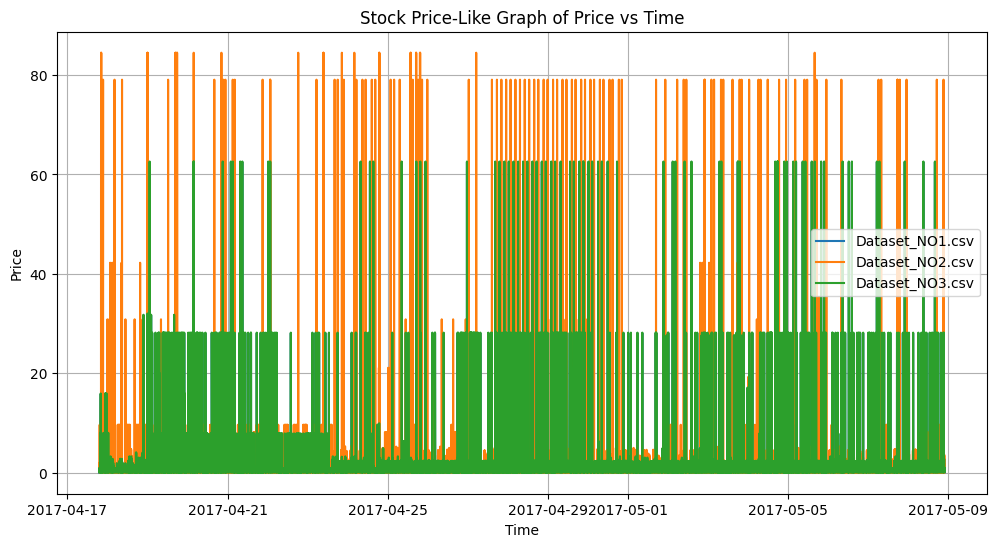

In [11]:
!pip install mplcursors
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mplcursors  # Import mplcursors for cursor functionality

# List of file paths for the three datasets
dataset_paths = [
    r"C:\Users\kevin\OneDrive\Desktop\code_fixed\Optimal-timing-for-bandwith-reservation-main\optimal_timing_for_bandwidth_reservation\datasets\Dataset_NO1.csv",
    r"C:\Users\kevin\OneDrive\Desktop\code_fixed\Optimal-timing-for-bandwith-reservation-main\optimal_timing_for_bandwidth_reservation\datasets\Dataset_NO2.csv",
    r"C:\Users\kevin\OneDrive\Desktop\code_fixed\Optimal-timing-for-bandwith-reservation-main\optimal_timing_for_bandwidth_reservation\datasets\Dataset_NO3.csv",
]

# Initialize the plot
plt.figure(figsize=(12, 6))
plt.title("Stock Price-Like Graph of Price vs Time")

# Plot Stock Price-Like Graph of Price vs Time for each dataset
for dataset_path in dataset_paths:
    # Load the dataset
    df = pd.read_csv(dataset_path)

    # Convert 'Date' column to datetime if not already
    df['Date'] = pd.to_datetime(df['Date'])

    # Sort the DataFrame by 'Date' for a continuous curve
    df.sort_values(by='Date', inplace=True)

    # Plot Stock Price-Like Graph
    line, = plt.plot(df['Date'], df['Price'], label=os.path.basename(dataset_path))

    # Add cursor functionality
    mplcursors.cursor(hover=True).connect(
        "add", lambda sel: sel.annotation.set_text(f"Price: {sel.artist.get_ydata()[sel.target.index]:.2f}")
    )

# Customize the plot
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()


C:\Users\kevin\AppData\Local\Temp\ipykernel_28336\3366835440.py:32: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_resampled = df.resample(plot_interval).mean()  # Use mean for multiple entries on the same date
C:\Users\kevin\AppData\Local\Temp\ipykernel_28336\3366835440.py:32: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_resampled = df.resample(plot_interval).mean()  # Use mean for multiple entries on the same date
C:\Users\kevin\AppData\Local\Temp\ipykernel_28336\3366835440.py:32: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_on

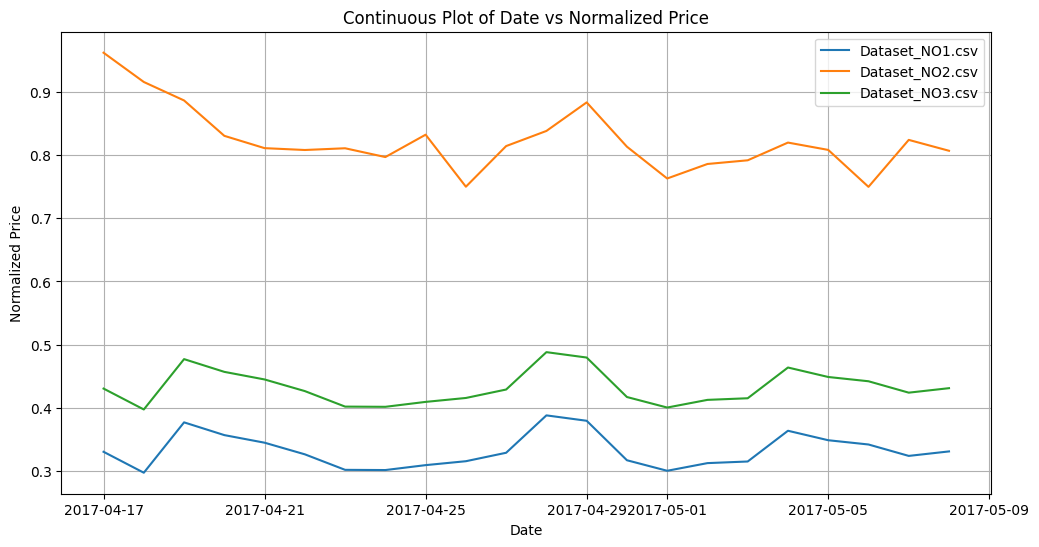

In [23]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# List of file paths for the three datasets
dataset_paths = [
    r"C:\Users\kevin\OneDrive\Desktop\code_fixed\Optimal-timing-for-bandwith-reservation-main\optimal_timing_for_bandwidth_reservation\datasets\Dataset_NO1.csv",
    r"C:\Users\kevin\OneDrive\Desktop\code_fixed\Optimal-timing-for-bandwith-reservation-main\optimal_timing_for_bandwidth_reservation\datasets\Dataset_NO2.csv",
    r"C:\Users\kevin\OneDrive\Desktop\code_fixed\Optimal-timing-for-bandwith-reservation-main\optimal_timing_for_bandwidth_reservation\datasets\Dataset_NO3.csv",
]

# Set the interval for plotting (e.g., daily, hourly)
plot_interval = 'D'  # Change to '1D' for 1-day interval

# Initialize the plot
plt.figure(figsize=(12, 6))
plt.title("Continuous Plot of Date vs Normalized Price")

# Plot Date vs Price for each dataset
for dataset_path in dataset_paths:
    # Load the dataset
    df = pd.read_csv(dataset_path)

    # Convert 'Date' column to datetime if not already
    df['Date'] = pd.to_datetime(df['Date'])

    # Set 'Date' as the index
    df.set_index('Date', inplace=True)

    # Resample the data at the specified interval and plot
    df_resampled = df.resample(plot_interval).mean()  # Use mean for multiple entries on the same date
    plt.plot(df_resampled.index, df_resampled['Price'], label=os.path.basename(dataset_path))

# Customize the plot
plt.xlabel("Date")
plt.ylabel("Normalized Price")
plt.legend()
plt.grid(True)
plt.show()


C:\Users\kevin\AppData\Local\Temp\ipykernel_28336\1756323012.py:32: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_resampled = df.resample(plot_interval).mean()  # Use mean for multiple entries on the same date
C:\Users\kevin\AppData\Local\Temp\ipykernel_28336\1756323012.py:32: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_resampled = df.resample(plot_interval).mean()  # Use mean for multiple entries on the same date
C:\Users\kevin\AppData\Local\Temp\ipykernel_28336\1756323012.py:32: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_on

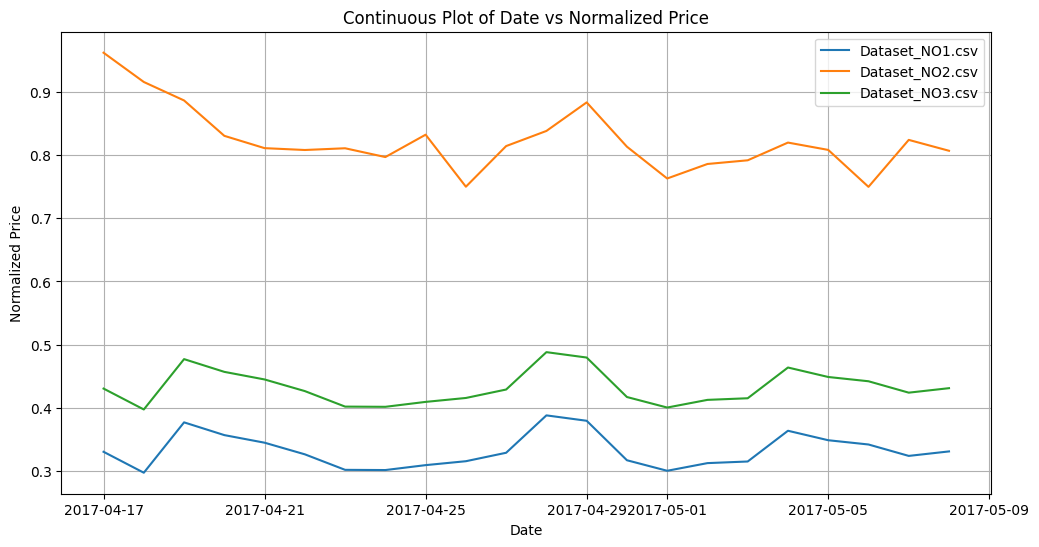

In [24]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# List of file paths for the three datasets
dataset_paths = [
    r"C:\Users\kevin\OneDrive\Desktop\code_fixed\Optimal-timing-for-bandwith-reservation-main\optimal_timing_for_bandwidth_reservation\datasets\Dataset_NO1.csv",
    r"C:\Users\kevin\OneDrive\Desktop\code_fixed\Optimal-timing-for-bandwith-reservation-main\optimal_timing_for_bandwidth_reservation\datasets\Dataset_NO2.csv",
    r"C:\Users\kevin\OneDrive\Desktop\code_fixed\Optimal-timing-for-bandwith-reservation-main\optimal_timing_for_bandwidth_reservation\datasets\Dataset_NO3.csv",
]

# Set the interval for plotting (e.g., daily, hourly)
plot_interval = '1D'  # 1-day interval

# Initialize the plot
plt.figure(figsize=(12, 6))
plt.title("Continuous Plot of Date vs Normalized Price")

# Plot Date vs Price for each dataset
for dataset_path in dataset_paths:
    # Load the dataset
    df = pd.read_csv(dataset_path)

    # Convert 'Date' column to datetime if not already
    df['Date'] = pd.to_datetime(df['Date'])

    # Set 'Date' as the index
    df.set_index('Date', inplace=True)

    # Resample the data at the specified interval and plot
    df_resampled = df.resample(plot_interval).mean()  # Use mean for multiple entries on the same date
    plt.plot(df_resampled.index, df_resampled['Price'], label=os.path.basename(dataset_path))

# Customize the plot
plt.xlabel("Date")
plt.ylabel("Normalized Price")
plt.legend()
plt.grid(True)
plt.show()


C:\Users\kevin\AppData\Local\Temp\ipykernel_28336\1756323012.py:32: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_resampled = df.resample(plot_interval).mean()  # Use mean for multiple entries on the same date
C:\Users\kevin\AppData\Local\Temp\ipykernel_28336\1756323012.py:32: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_resampled = df.resample(plot_interval).mean()  # Use mean for multiple entries on the same date
C:\Users\kevin\AppData\Local\Temp\ipykernel_28336\1756323012.py:32: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_on

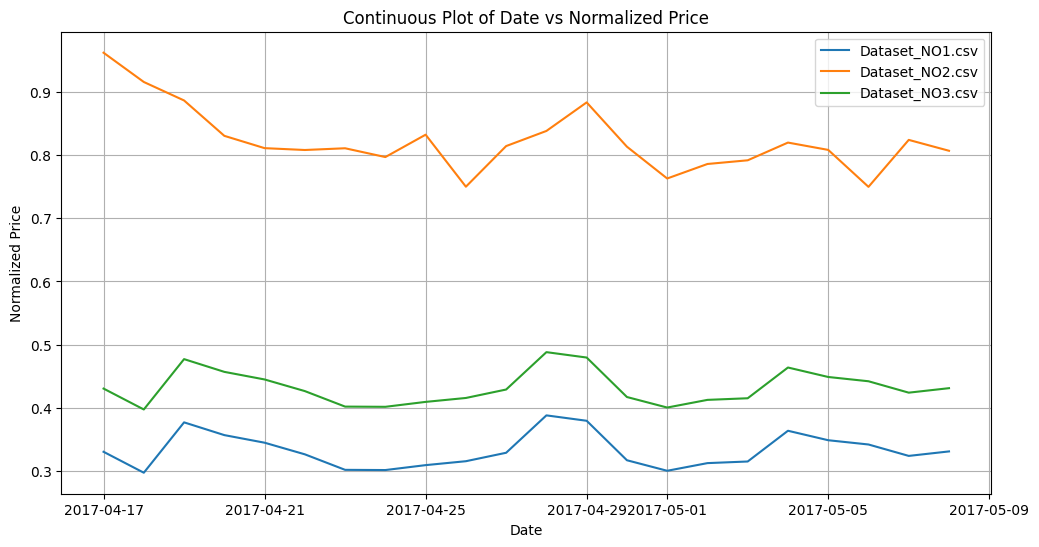

In [24]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# List of file paths for the three datasets
dataset_paths = [
    r"C:\Users\kevin\OneDrive\Desktop\code_fixed\Optimal-timing-for-bandwith-reservation-main\optimal_timing_for_bandwidth_reservation\datasets\Dataset_NO1.csv",
    r"C:\Users\kevin\OneDrive\Desktop\code_fixed\Optimal-timing-for-bandwith-reservation-main\optimal_timing_for_bandwidth_reservation\datasets\Dataset_NO2.csv",
    r"C:\Users\kevin\OneDrive\Desktop\code_fixed\Optimal-timing-for-bandwith-reservation-main\optimal_timing_for_bandwidth_reservation\datasets\Dataset_NO3.csv",
]

# Set the interval for plotting (e.g., daily, hourly)
plot_interval = '1D'  # 1-day interval

# Initialize the plot
plt.figure(figsize=(12, 6))
plt.title("Continuous Plot of Date vs Normalized Price")

# Plot Date vs Price for each dataset
for dataset_path in dataset_paths:
    # Load the dataset
    df = pd.read_csv(dataset_path)

    # Convert 'Date' column to datetime if not already
    df['Date'] = pd.to_datetime(df['Date'])

    # Set 'Date' as the index
    df.set_index('Date', inplace=True)

    # Resample the data at the specified interval and plot
    df_resampled = df.resample(plot_interval).mean()  # Use mean for multiple entries on the same date
    plt.plot(df_resampled.index, df_resampled['Price'], label=os.path.basename(dataset_path))

# Customize the plot
plt.xlabel("Date")
plt.ylabel("Normalized Price")
plt.legend()
plt.grid(True)
plt.show()


C:\Users\kevin\AppData\Local\Temp\ipykernel_28336\4204060488.py:32: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_resampled = df.resample(plot_interval).mean()  # Use mean for multiple entries on the same date
C:\Users\kevin\AppData\Local\Temp\ipykernel_28336\4204060488.py:32: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_resampled = df.resample(plot_interval).mean()  # Use mean for multiple entries on the same date
C:\Users\kevin\AppData\Local\Temp\ipykernel_28336\4204060488.py:32: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_on

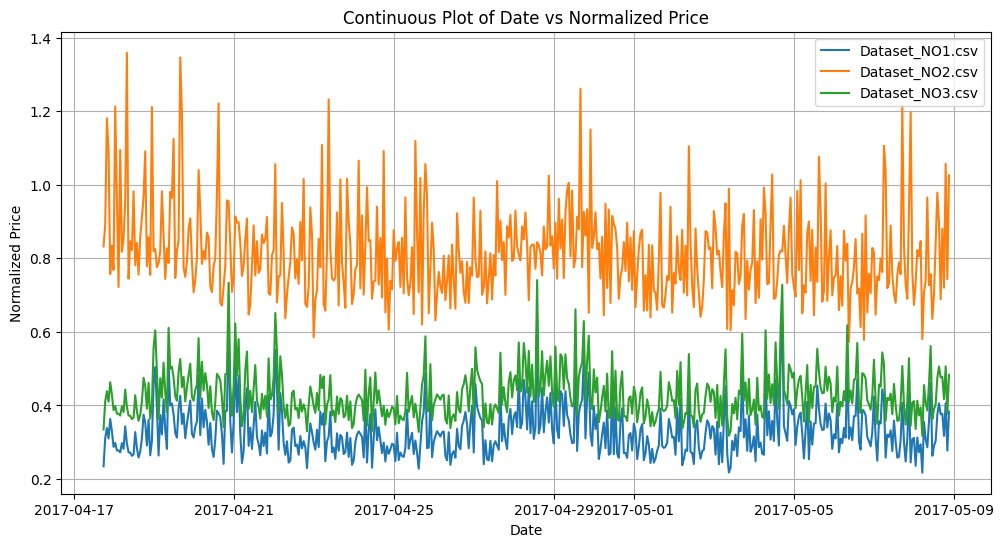

In [25]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# List of file paths for the three datasets
dataset_paths = [
    r"C:\Users\kevin\OneDrive\Desktop\code_fixed\Optimal-timing-for-bandwith-reservation-main\optimal_timing_for_bandwidth_reservation\datasets\Dataset_NO1.csv",
    r"C:\Users\kevin\OneDrive\Desktop\code_fixed\Optimal-timing-for-bandwith-reservation-main\optimal_timing_for_bandwidth_reservation\datasets\Dataset_NO2.csv",
    r"C:\Users\kevin\OneDrive\Desktop\code_fixed\Optimal-timing-for-bandwith-reservation-main\optimal_timing_for_bandwidth_reservation\datasets\Dataset_NO3.csv",
]

# Set the interval for plotting (e.g., daily, hourly)
plot_interval = '1H'  # 1-hour interval

# Initialize the plot
plt.figure(figsize=(12, 6))
plt.title("Continuous Plot of Date vs Normalized Price")

# Plot Date vs Price for each dataset
for dataset_path in dataset_paths:
    # Load the dataset
    df = pd.read_csv(dataset_path)

    # Convert 'Date' column to datetime if not already
    df['Date'] = pd.to_datetime(df['Date'])

    # Set 'Date' as the index
    df.set_index('Date', inplace=True)

    # Resample the data at the specified interval and plot
    df_resampled = df.resample(plot_interval).mean()  # Use mean for multiple entries on the same date
    plt.plot(df_resampled.index, df_resampled['Price'], label=os.path.basename(dataset_path))

# Customize the plot
plt.xlabel("Date")
plt.ylabel("Normalized Price")
plt.legend()
plt.grid(True)
plt.show()


C:\Users\kevin\AppData\Local\Temp\ipykernel_28336\1081956166.py:32: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_resampled = df.resample(plot_interval).mean()  # Use mean for multiple entries on the same date
C:\Users\kevin\AppData\Local\Temp\ipykernel_28336\1081956166.py:32: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_resampled = df.resample(plot_interval).mean()  # Use mean for multiple entries on the same date
C:\Users\kevin\AppData\Local\Temp\ipykernel_28336\1081956166.py:32: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_on

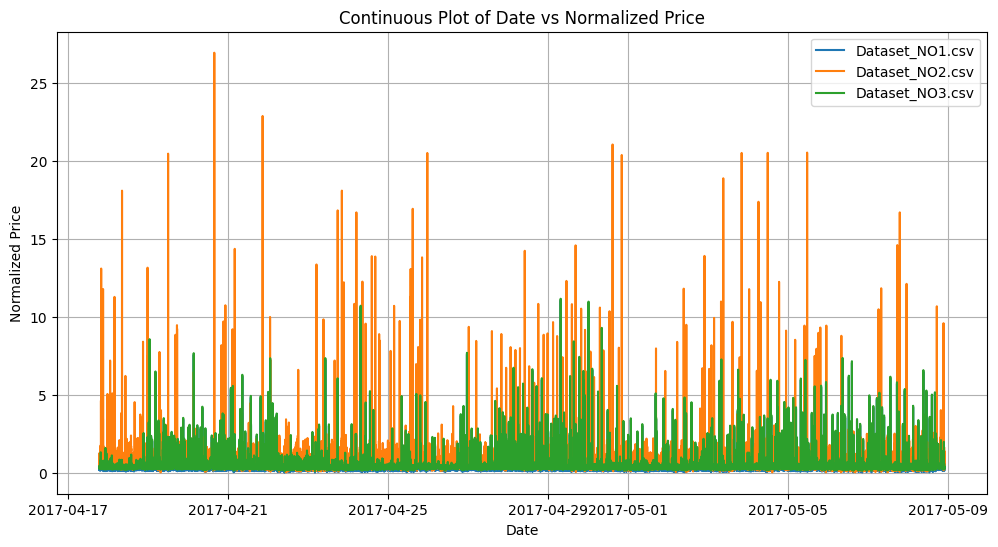

In [26]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# List of file paths for the three datasets
dataset_paths = [
    r"C:\Users\kevin\OneDrive\Desktop\code_fixed\Optimal-timing-for-bandwith-reservation-main\optimal_timing_for_bandwidth_reservation\datasets\Dataset_NO1.csv",
    r"C:\Users\kevin\OneDrive\Desktop\code_fixed\Optimal-timing-for-bandwith-reservation-main\optimal_timing_for_bandwidth_reservation\datasets\Dataset_NO2.csv",
    r"C:\Users\kevin\OneDrive\Desktop\code_fixed\Optimal-timing-for-bandwith-reservation-main\optimal_timing_for_bandwidth_reservation\datasets\Dataset_NO3.csv",
]

# Set the interval for plotting (e.g., daily, hourly, 1-minute)
plot_interval = '1T'  # 1-minute interval

# Initialize the plot
plt.figure(figsize=(12, 6))
plt.title("Continuous Plot of Date vs Normalized Price")

# Plot Date vs Price for each dataset
for dataset_path in dataset_paths:
    # Load the dataset
    df = pd.read_csv(dataset_path)

    # Convert 'Date' column to datetime if not already
    df['Date'] = pd.to_datetime(df['Date'])

    # Set 'Date' as the index
    df.set_index('Date', inplace=True)

    # Resample the data at the specified interval and plot
    df_resampled = df.resample(plot_interval).mean()  # Use mean for multiple entries on the same date
    plt.plot(df_resampled.index, df_resampled['Price'], label=os.path.basename(dataset_path))

# Customize the plot
plt.xlabel("Date")
plt.ylabel("Normalized Price")
plt.legend()
plt.grid(True)
plt.show()


C:\Users\kevin\AppData\Local\Temp\ipykernel_28336\4086680888.py:32: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_resampled = df.resample(plot_interval).mean()
C:\Users\kevin\AppData\Local\Temp\ipykernel_28336\4086680888.py:32: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_resampled = df.resample(plot_interval).mean()
C:\Users\kevin\AppData\Local\Temp\ipykernel_28336\4086680888.py:32: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid f

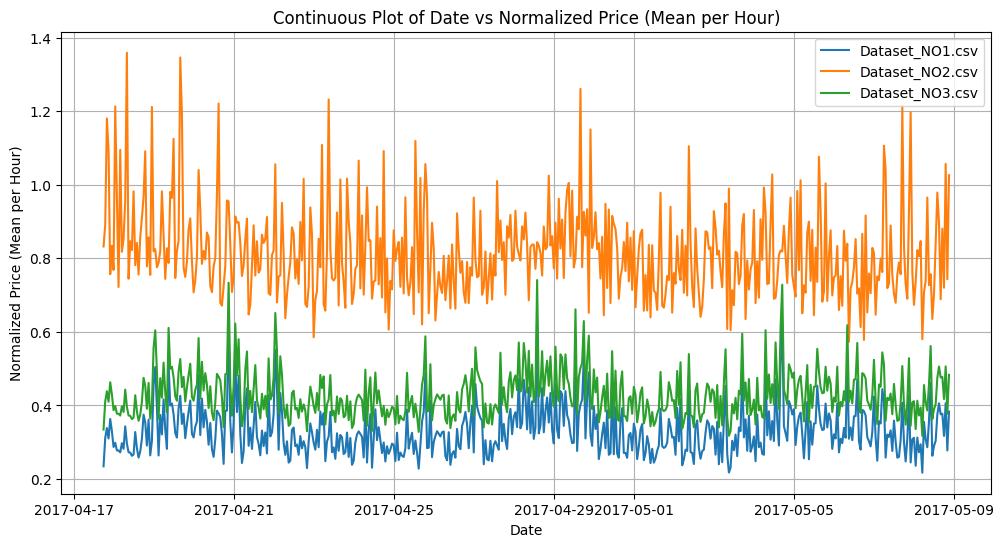

In [27]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# List of file paths for the three datasets
dataset_paths = [
    r"C:\Users\kevin\OneDrive\Desktop\code_fixed\Optimal-timing-for-bandwith-reservation-main\optimal_timing_for_bandwidth_reservation\datasets\Dataset_NO1.csv",
    r"C:\Users\kevin\OneDrive\Desktop\code_fixed\Optimal-timing-for-bandwith-reservation-main\optimal_timing_for_bandwidth_reservation\datasets\Dataset_NO2.csv",
    r"C:\Users\kevin\OneDrive\Desktop\code_fixed\Optimal-timing-for-bandwith-reservation-main\optimal_timing_for_bandwidth_reservation\datasets\Dataset_NO3.csv",
]

# Set the interval for plotting (e.g., daily, hourly, 1-minute)
plot_interval = '1H'  # 1-hour interval, selecting mean value for each hour

# Initialize the plot
plt.figure(figsize=(12, 6))
plt.title("Continuous Plot of Date vs Normalized Price (Mean per Hour)")

# Plot Date vs Price for each dataset
for dataset_path in dataset_paths:
    # Load the dataset
    df = pd.read_csv(dataset_path)

    # Convert 'Date' column to datetime if not already
    df['Date'] = pd.to_datetime(df['Date'])

    # Set 'Date' as the index
    df.set_index('Date', inplace=True)

    # Resample the data at the specified interval, taking the mean for each hour
    df_resampled = df.resample(plot_interval).mean()  
    plt.plot(df_resampled.index, df_resampled['Price'], label=os.path.basename(dataset_path))

# Customize the plot
plt.xlabel("Date")
plt.ylabel("Normalized Price (Mean per Hour)")
plt.legend()
plt.grid(True)
plt.show()


C:\Users\kevin\AppData\Local\Temp\ipykernel_19748\1756323012.py:32: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_resampled = df.resample(plot_interval).mean()  # Use mean for multiple entries on the same date
C:\Users\kevin\AppData\Local\Temp\ipykernel_19748\1756323012.py:32: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_resampled = df.resample(plot_interval).mean()  # Use mean for multiple entries on the same date
C:\Users\kevin\AppData\Local\Temp\ipykernel_19748\1756323012.py:32: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_on

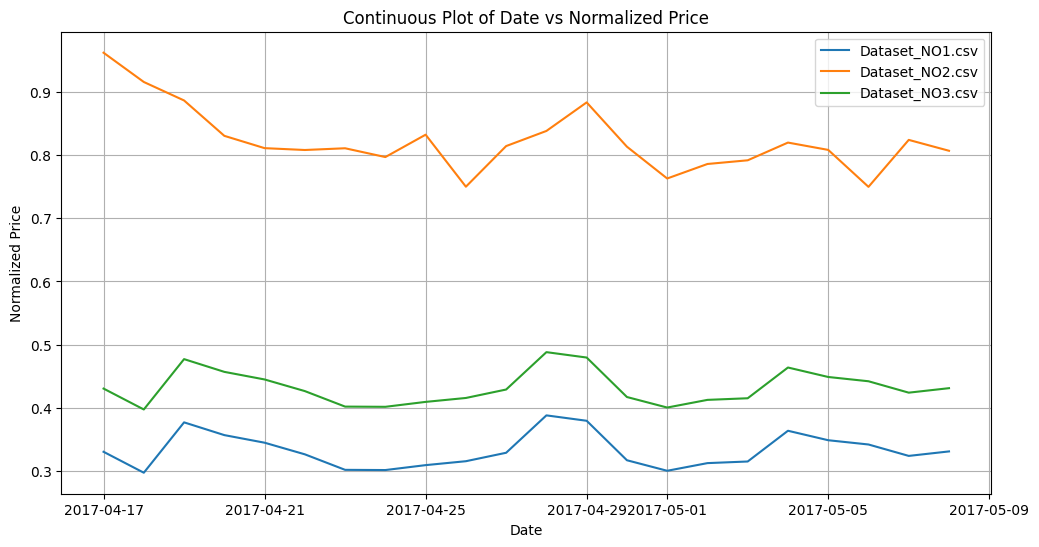

C:\Users\kevin\AppData\Local\Temp\ipykernel_19748\1902900306.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_resampled = df.resample(plot_interval).mean()  # Use mean for multiple entries on the same date
C:\Users\kevin\AppData\Local\Temp\ipykernel_19748\1902900306.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_resampled = df.resample(plot_interval).mean()  # Use mean for multiple entries on the same date
C:\Users\kevin\AppData\Local\Temp\ipykernel_19748\1902900306.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_on

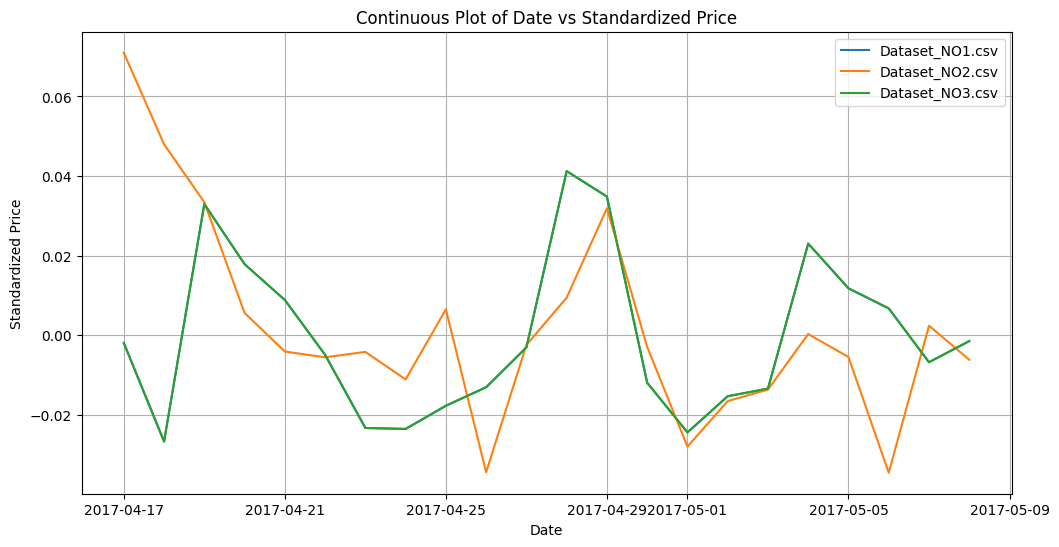

In [11]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# List of file paths for the three datasets
dataset_paths = [
    r"C:\Users\kevin\OneDrive\Desktop\code_fixed\Optimal-timing-for-bandwith-reservation-main\optimal_timing_for_bandwidth_reservation\datasets\Dataset_NO1.csv",
    r"C:\Users\kevin\OneDrive\Desktop\code_fixed\Optimal-timing-for-bandwith-reservation-main\optimal_timing_for_bandwidth_reservation\datasets\Dataset_NO2.csv",
    r"C:\Users\kevin\OneDrive\Desktop\code_fixed\Optimal-timing-for-bandwith-reservation-main\optimal_timing_for_bandwidth_reservation\datasets\Dataset_NO3.csv",
]

# Set the interval for plotting (e.g., daily, hourly)
plot_interval = '1D'  # 1-day interval

# Initialize the plot
plt.figure(figsize=(12, 6))
plt.title("Continuous Plot of Date vs Standardized Price")

# Plot Date vs Standardized Price for each dataset
for dataset_path in dataset_paths:
    # Load the dataset
    df = pd.read_csv(dataset_path)

    # Convert 'Date' column to datetime if not already
    df['Date'] = pd.to_datetime(df['Date'])

    # Set 'Date' as the index
    df.set_index('Date', inplace=True)

    # Standardize the 'Price' column
    scaler = StandardScaler()
    df['Standardized_Price'] = scaler.fit_transform(df['Price'].values.reshape(-1, 1)).flatten()

    # Resample the data at the specified interval and plot
    df_resampled = df.resample(plot_interval).mean()  # Use mean for multiple entries on the same date
    plt.plot(df_resampled.index, df_resampled['Standardized_Price'], label=os.path.basename(dataset_path))

# Customize the plot
plt.xlabel("Date")
plt.ylabel("Standardized Price")
plt.legend()
plt.grid(True)
plt.show()


C:\Users\kevin\AppData\Local\Temp\ipykernel_19748\4290489514.py:41: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_resampled = df.resample(plot_interval).mean()  # Use mean for multiple entries on the same date
C:\Users\kevin\AppData\Local\Temp\ipykernel_19748\4290489514.py:41: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_resampled = df.resample(plot_interval).mean()  # Use mean for multiple entries on the same date
C:\Users\kevin\AppData\Local\Temp\ipykernel_19748\4290489514.py:41: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_on

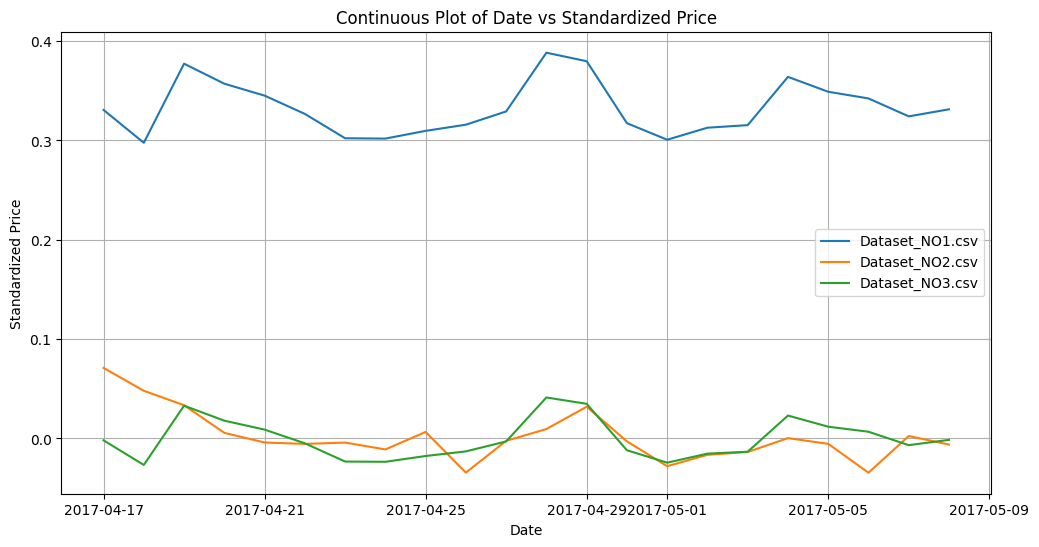

In [13]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# List of file paths for the three datasets
dataset_paths = [
    r"C:\Users\kevin\OneDrive\Desktop\code_fixed\Optimal-timing-for-bandwith-reservation-main\optimal_timing_for_bandwidth_reservation\datasets\Dataset_NO1.csv",
    r"C:\Users\kevin\OneDrive\Desktop\code_fixed\Optimal-timing-for-bandwith-reservation-main\optimal_timing_for_bandwidth_reservation\datasets\Dataset_NO2.csv",
    r"C:\Users\kevin\OneDrive\Desktop\code_fixed\Optimal-timing-for-bandwith-reservation-main\optimal_timing_for_bandwidth_reservation\datasets\Dataset_NO3.csv",
]

# Set the interval for plotting (e.g., daily, hourly)
plot_interval = '1D'  # 1-day interval

# Initialize the plot
plt.figure(figsize=(12, 6))
plt.title("Continuous Plot of Date vs Standardized Price")

# Plot Date vs Standardized Price for each dataset
for dataset_path in dataset_paths:
    # Load the dataset
    df = pd.read_csv(dataset_path)

    # Convert 'Date' column to datetime if not already
    df['Date'] = pd.to_datetime(df['Date'])

    # Set 'Date' as the index
    df.set_index('Date', inplace=True)

    # Standardize the 'Price' column
    scaler = StandardScaler()

    # Different scaling for Dataset_NO1
    if 'Dataset_NO1' in dataset_path:
        df['Standardized_Price'] = df['Price']  # No scaling for Dataset_NO1
    else:
        df['Standardized_Price'] = scaler.fit_transform(df['Price'].values.reshape(-1, 1)).flatten()

    # Resample the data at the specified interval and plot
    df_resampled = df.resample(plot_interval).mean()  # Use mean for multiple entries on the same date
    plt.plot(df_resampled.index, df_resampled['Standardized_Price'], label=os.path.basename(dataset_path))

# Customize the plot
plt.xlabel("Date")
plt.ylabel("Standardized Price")
plt.legend()
plt.grid(True)
plt.show()


C:\Users\kevin\AppData\Local\Temp\ipykernel_19748\3760008389.py:31: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_resampled = df.resample(plot_interval).mean()
C:\Users\kevin\AppData\Local\Temp\ipykernel_19748\3760008389.py:31: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_resampled = df.resample(plot_interval).mean()
C:\Users\kevin\AppData\Local\Temp\ipykernel_19748\3760008389.py:31: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid f

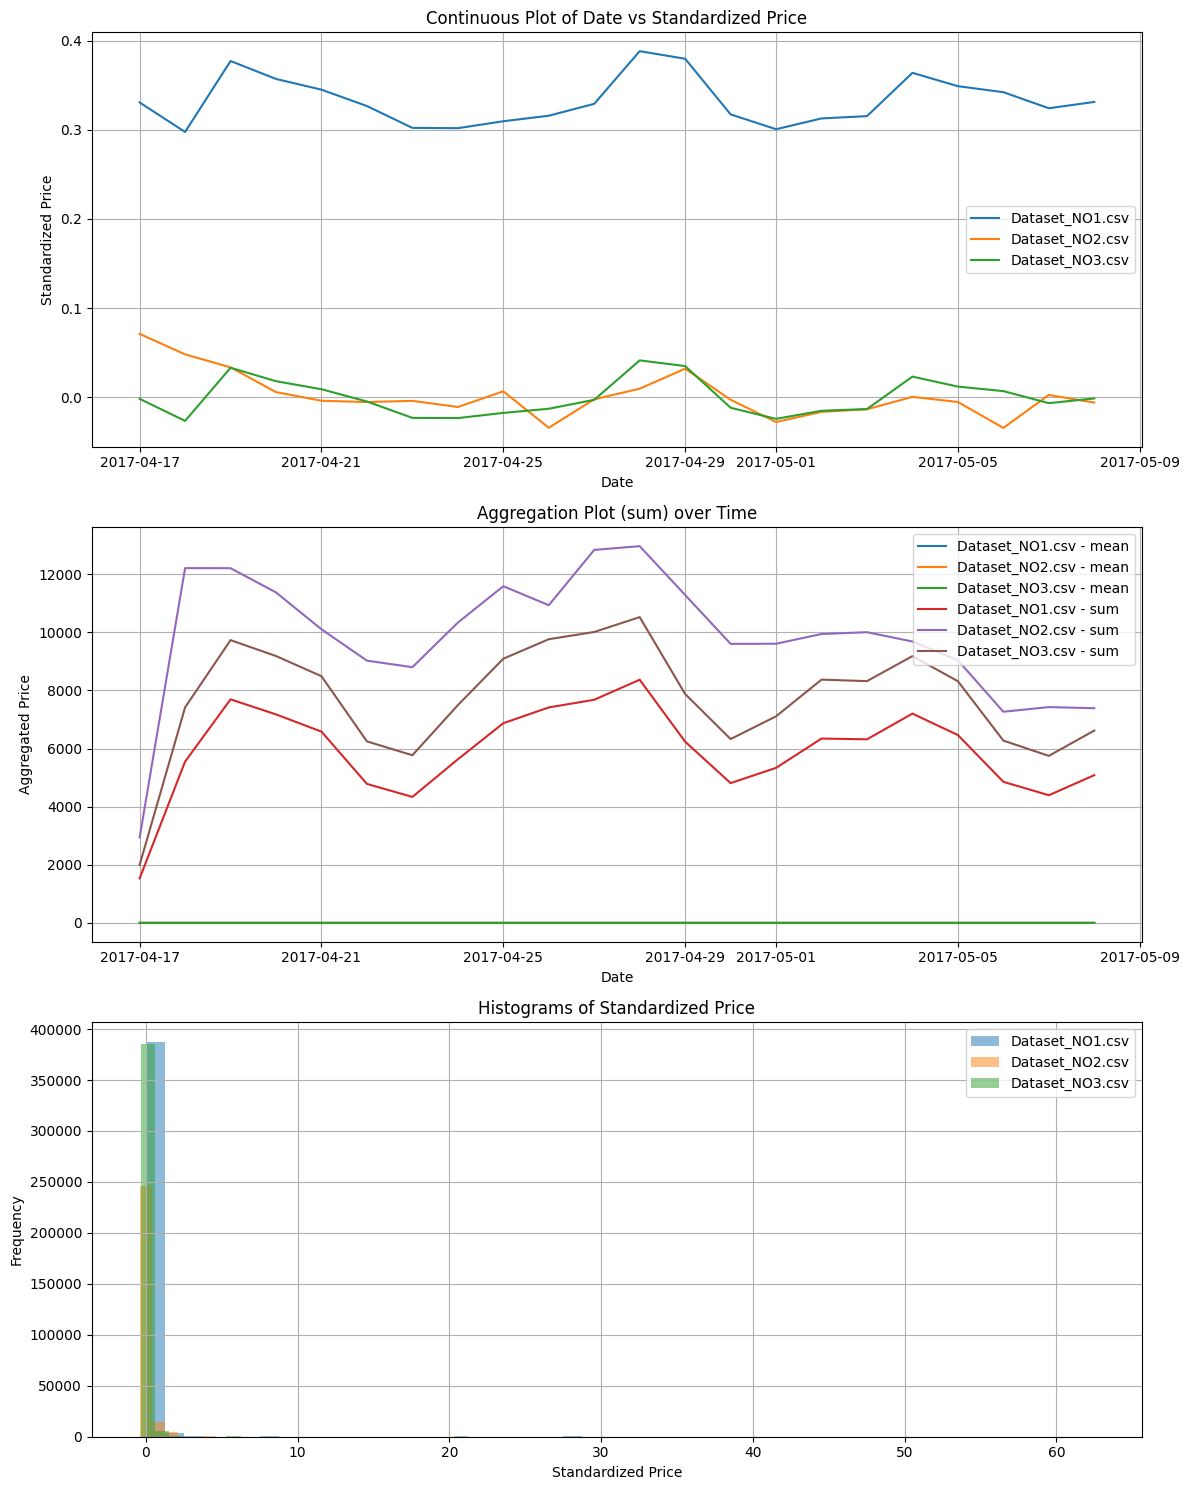

In [14]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# List of file paths for the three datasets
dataset_paths = [
    r"C:\Users\kevin\OneDrive\Desktop\code_fixed\Optimal-timing-for-bandwith-reservation-main\optimal_timing_for_bandwidth_reservation\datasets\Dataset_NO1.csv",
    r"C:\Users\kevin\OneDrive\Desktop\code_fixed\Optimal-timing-for-bandwith-reservation-main\optimal_timing_for_bandwidth_reservation\datasets\Dataset_NO2.csv",
    r"C:\Users\kevin\OneDrive\Desktop\code_fixed\Optimal-timing-for-bandwith-reservation-main\optimal_timing_for_bandwidth_reservation\datasets\Dataset_NO3.csv",
]

# Set the interval for plotting (e.g., daily, hourly)
plot_interval = '1D'  # 1-day interval

# Initialize the plots
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 15))

# Plot 1: Continuous Plot of Date vs Standardized Price
ax1.set_title("Continuous Plot of Date vs Standardized Price")
for dataset_path in dataset_paths:
    df = pd.read_csv(dataset_path)
    df['Date'] = pd.to_datetime(df['Date'])
    df.set_index('Date', inplace=True)
    scaler = StandardScaler()
    if 'Dataset_NO1' in dataset_path:
        df['Standardized_Price'] = df['Price']  # No scaling for Dataset_NO1
    else:
        df['Standardized_Price'] = scaler.fit_transform(df['Price'].values.reshape(-1, 1)).flatten()
    df_resampled = df.resample(plot_interval).mean()
    ax1.plot(df_resampled.index, df_resampled['Standardized_Price'], label=os.path.basename(dataset_path))
ax1.set_xlabel("Date")
ax1.set_ylabel("Standardized Price")
ax1.legend()
ax1.grid(True)

# Plot 2: Aggregations (e.g., mean, sum) over time
aggregations = ['mean', 'sum']
for agg in aggregations:
    ax2.set_title(f"Aggregation Plot ({agg}) over Time")
    for dataset_path in dataset_paths:
        df = pd.read_csv(dataset_path)
        df['Date'] = pd.to_datetime(df['Date'])
        df.set_index('Date', inplace=True)
        df_resampled = df.resample(plot_interval).agg({'Price': agg})
        ax2.plot(df_resampled.index, df_resampled['Price'], label=f"{os.path.basename(dataset_path)} - {agg}")
    ax2.set_xlabel("Date")
    ax2.set_ylabel("Aggregated Price")
    ax2.legend()
    ax2.grid(True)

# Plot 3: Histograms
ax3.set_title("Histograms of Standardized Price")
for dataset_path in dataset_paths:
    df = pd.read_csv(dataset_path)
    scaler = StandardScaler()
    if 'Dataset_NO1' in dataset_path:
        df['Standardized_Price'] = df['Price']  # No scaling for Dataset_NO1
    else:
        df['Standardized_Price'] = scaler.fit_transform(df['Price'].values.reshape(-1, 1)).flatten()
    ax3.hist(df['Standardized_Price'], bins=50, alpha=0.5, label=os.path.basename(dataset_path))
ax3.set_xlabel("Standardized Price")
ax3.set_ylabel("Frequency")
ax3.legend()
ax3.grid(True)

plt.tight_layout()
plt.show()


C:\Users\kevin\AppData\Local\Temp\ipykernel_19748\964263862.py:31: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_resampled = df.resample(plot_interval).mean()
C:\Users\kevin\AppData\Local\Temp\ipykernel_19748\964263862.py:31: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_resampled = df.resample(plot_interval).mean()
C:\Users\kevin\AppData\Local\Temp\ipykernel_19748\964263862.py:31: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for 

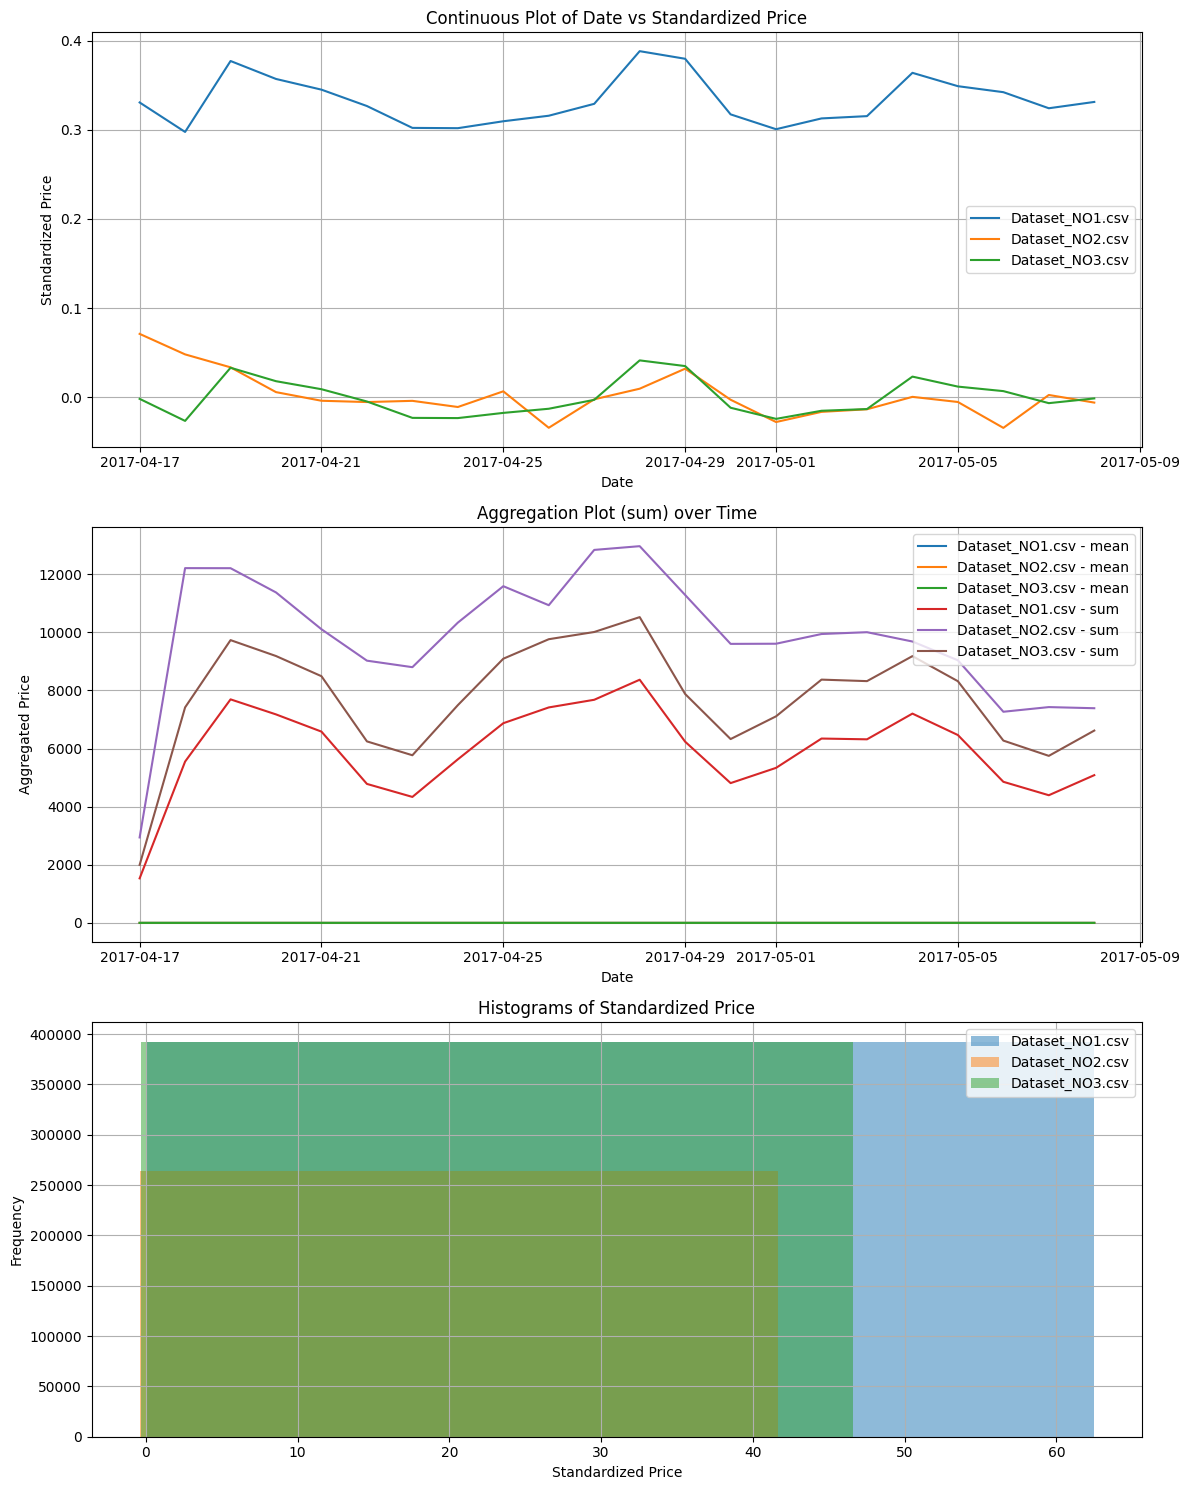

In [17]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# List of file paths for the three datasets
dataset_paths = [
    r"C:\Users\kevin\OneDrive\Desktop\code_fixed\Optimal-timing-for-bandwith-reservation-main\optimal_timing_for_bandwidth_reservation\datasets\Dataset_NO1.csv",
    r"C:\Users\kevin\OneDrive\Desktop\code_fixed\Optimal-timing-for-bandwith-reservation-main\optimal_timing_for_bandwidth_reservation\datasets\Dataset_NO2.csv",
    r"C:\Users\kevin\OneDrive\Desktop\code_fixed\Optimal-timing-for-bandwith-reservation-main\optimal_timing_for_bandwidth_reservation\datasets\Dataset_NO3.csv",
]

# Set the interval for plotting (e.g., daily, hourly)
plot_interval = '1D'  # 1-day interval

# Initialize the plots
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 15))

# Plot 1: Continuous Plot of Date vs Standardized Price
ax1.set_title("Continuous Plot of Date vs Standardized Price")
for dataset_path in dataset_paths:
    df = pd.read_csv(dataset_path)
    df['Date'] = pd.to_datetime(df['Date'])
    df.set_index('Date', inplace=True)
    scaler = StandardScaler()
    if 'Dataset_NO1' in dataset_path:
        df['Standardized_Price'] = df['Price']  # No scaling for Dataset_NO1
    else:
        df['Standardized_Price'] = scaler.fit_transform(df['Price'].values.reshape(-1, 1)).flatten()
    df_resampled = df.resample(plot_interval).mean()
    ax1.plot(df_resampled.index, df_resampled['Standardized_Price'], label=os.path.basename(dataset_path))
ax1.set_xlabel("Date")
ax1.set_ylabel("Standardized Price")
ax1.legend()
ax1.grid(True)

# Plot 2: Aggregations (e.g., mean, sum) over time
aggregations = ['mean', 'sum']
for agg in aggregations:
    ax2.set_title(f"Aggregation Plot ({agg}) over Time")
    for dataset_path in dataset_paths:
        df = pd.read_csv(dataset_path)
        df['Date'] = pd.to_datetime(df['Date'])
        df.set_index('Date', inplace=True)
        df_resampled = df.resample(plot_interval).agg({'Price': agg})
        ax2.plot(df_resampled.index, df_resampled['Price'], label=f"{os.path.basename(dataset_path)} - {agg}")
    ax2.set_xlabel("Date")
    ax2.set_ylabel("Aggregated Price")
    ax2.legend()
    ax2.grid(True)

# Plot 3: Histograms
ax3.set_title("Histograms of Standardized Price")
for dataset_path in dataset_paths:
    df = pd.read_csv(dataset_path)
    scaler = StandardScaler()
    if 'Dataset_NO1' in dataset_path:
        df['Standardized_Price'] = df['Price']  # No scaling for Dataset_NO1
    else:
        df['Standardized_Price'] = scaler.fit_transform(df['Price'].values.reshape(-1, 1)).flatten()
    ax3.hist(df['Standardized_Price'], bins=1, alpha=0.5, label=os.path.basename(dataset_path))
ax3.set_xlabel("Standardized Price")
ax3.set_ylabel("Frequency")
ax3.legend()
ax3.grid(True)

plt.tight_layout()
plt.show()


C:\Users\kevin\AppData\Local\Temp\ipykernel_19748\171973125.py:34: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_resampled = df.resample(plot_interval).mean()  # Use mean for multiple entries on the same date
C:\Users\kevin\AppData\Local\Temp\ipykernel_19748\171973125.py:34: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_resampled = df.resample(plot_interval).mean()  # Use mean for multiple entries on the same date
C:\Users\kevin\AppData\Local\Temp\ipykernel_19748\171973125.py:34: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only 

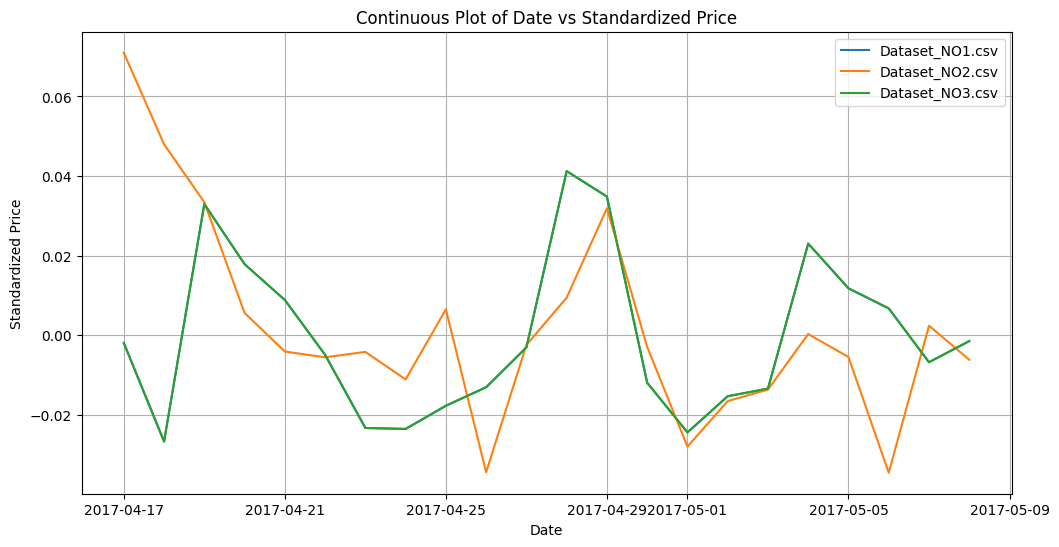

In [18]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# List of file paths for the three datasets
dataset_paths = [
    r"C:\Users\kevin\OneDrive\Desktop\code_fixed\Optimal-timing-for-bandwith-reservation-main\optimal_timing_for_bandwidth_reservation\datasets\Dataset_NO1.csv",
    r"C:\Users\kevin\OneDrive\Desktop\code_fixed\Optimal-timing-for-bandwith-reservation-main\optimal_timing_for_bandwidth_reservation\datasets\Dataset_NO2.csv",
    r"C:\Users\kevin\OneDrive\Desktop\code_fixed\Optimal-timing-for-bandwith-reservation-main\optimal_timing_for_bandwidth_reservation\datasets\Dataset_NO3.csv",
]

# Initialize the plot
plt.figure(figsize=(12, 6))
plt.title("Continuous Plot of Date vs Standardized Price")

# Standardize Price for each dataset and plot
for dataset_path in dataset_paths:
    # Load the dataset
    df = pd.read_csv(dataset_path)

    # Convert 'Date' column to datetime if not already
    df['Date'] = pd.to_datetime(df['Date'])

    # Set 'Date' as the index
    df.set_index('Date', inplace=True)

    # Standardize the 'Price' column
    scaler = StandardScaler()
    df['Standardized_Price'] = scaler.fit_transform(df['Price'].values.reshape(-1, 1))

    # Resample the data at the specified interval and plot
    df_resampled = df.resample(plot_interval).mean()  # Use mean for multiple entries on the same date
    plt.plot(df_resampled.index, df_resampled['Standardized_Price'], label=os.path.basename(dataset_path))

# Customize the plot
plt.xlabel("Date")
plt.ylabel("Standardized Price")
plt.legend()
plt.grid(True)
plt.show()


C:\Users\kevin\AppData\Local\Temp\ipykernel_19748\2464184957.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_resampled = df.resample(plot_interval).mean()  # Use mean for multiple entries on the same date
C:\Users\kevin\AppData\Local\Temp\ipykernel_19748\2464184957.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_resampled = df.resample(plot_interval).mean()  # Use mean for multiple entries on the same date
C:\Users\kevin\AppData\Local\Temp\ipykernel_19748\2464184957.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_on

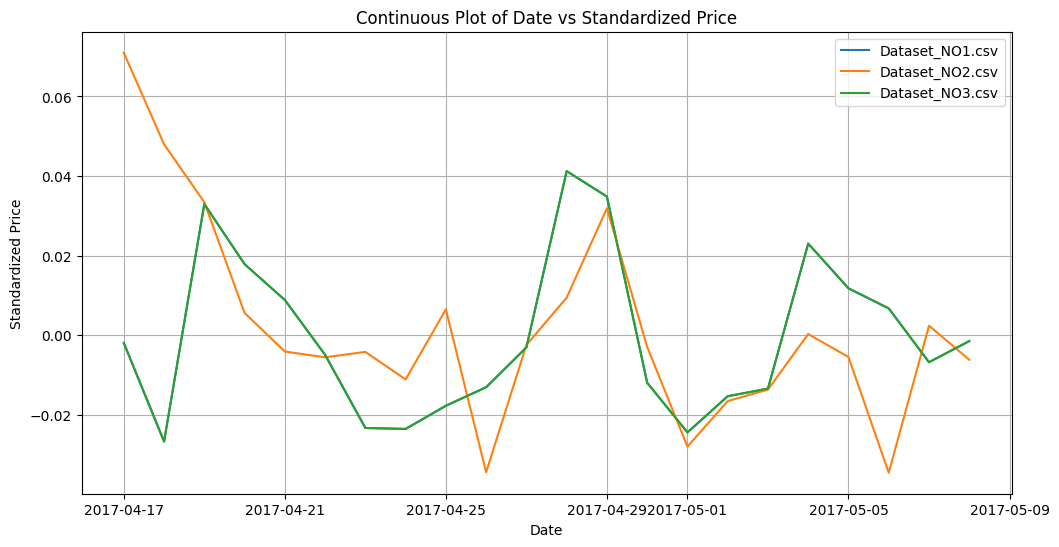

In [19]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# List of file paths for the three datasets
dataset_paths = [
    r"C:\Users\kevin\OneDrive\Desktop\code_fixed\Optimal-timing-for-bandwith-reservation-main\optimal_timing_for_bandwidth_reservation\datasets\Dataset_NO1.csv",
    r"C:\Users\kevin\OneDrive\Desktop\code_fixed\Optimal-timing-for-bandwith-reservation-main\optimal_timing_for_bandwidth_reservation\datasets\Dataset_NO2.csv",
    r"C:\Users\kevin\OneDrive\Desktop\code_fixed\Optimal-timing-for-bandwith-reservation-main\optimal_timing_for_bandwidth_reservation\datasets\Dataset_NO3.csv",
]

# Initialize the plot
plt.figure(figsize=(12, 6))
plt.title("Continuous Plot of Date vs Standardized Price")

# Standardize Price for each dataset and plot
for dataset_path in dataset_paths:
    # Load the dataset
    df = pd.read_csv(dataset_path)

    # Convert 'Date' column to datetime if not already
    df['Date'] = pd.to_datetime(df['Date'])

    # Set 'Date' as the index
    df.set_index('Date', inplace=True)

    # Check if 'Price' column exists
    if 'Price' in df.columns:
        # Standardize the 'Price' column
        scaler = StandardScaler()
        df['Standardized_Price'] = scaler.fit_transform(df['Price'].values.reshape(-1, 1))

        # Resample the data at the specified interval and plot
        df_resampled = df.resample(plot_interval).mean()  # Use mean for multiple entries on the same date
        plt.plot(df_resampled.index, df_resampled['Standardized_Price'], label=os.path.basename(dataset_path))

# Customize the plot
plt.xlabel("Date")
plt.ylabel("Standardized Price")
plt.legend()
plt.grid(True)
plt.show()


C:\Users\kevin\AppData\Local\Temp\ipykernel_19748\2773568066.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = df.groupby(df.index).mean()
C:\Users\kevin\AppData\Local\Temp\ipykernel_19748\2773568066.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = df.groupby(df.index).mean()
C:\Users\kevin\AppData\Local\Temp\ipykernel_19748\2773568066.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = df.group

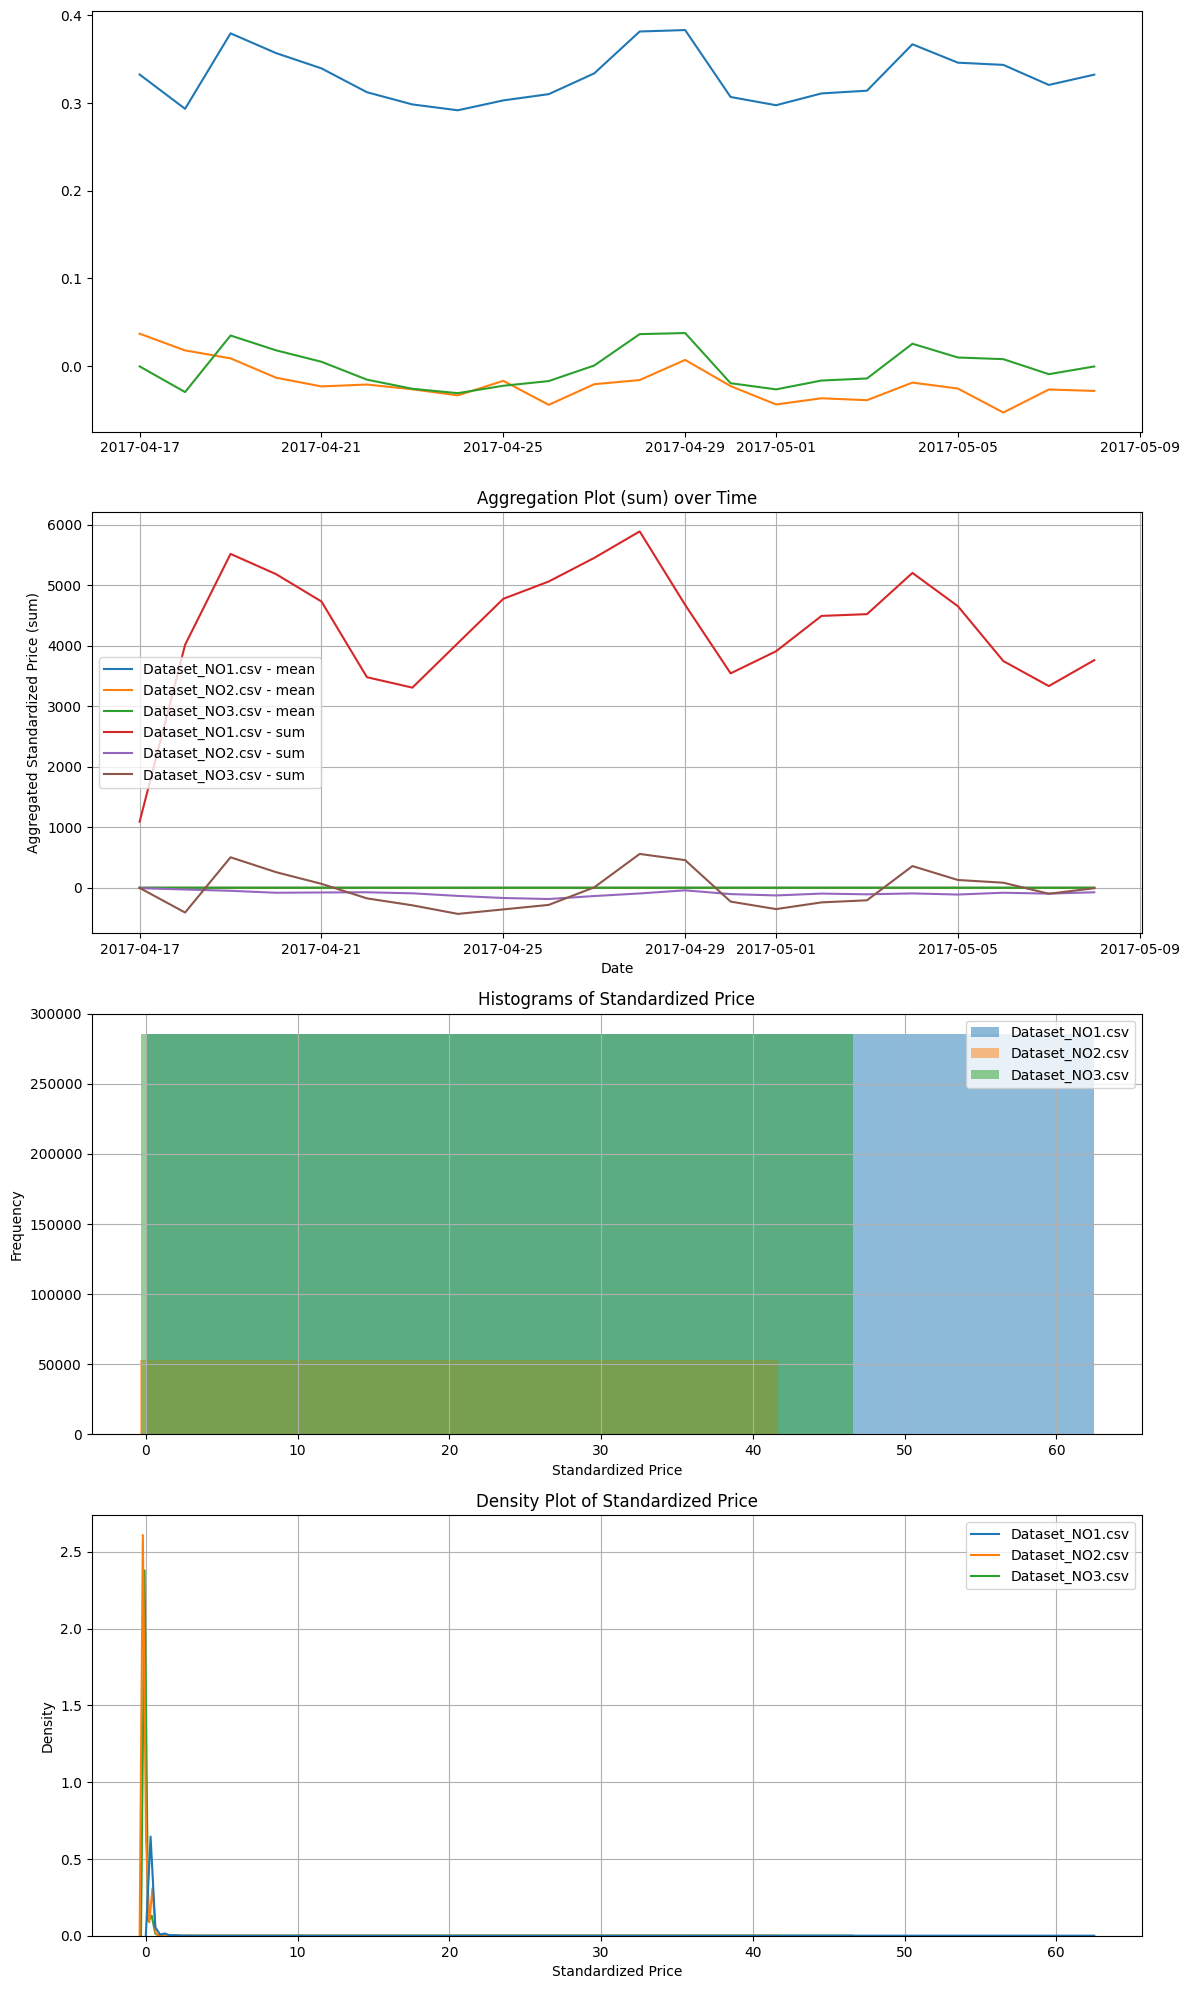

In [29]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy.stats import norm

# List of file paths for the three datasets
dataset_paths = [
    r"C:\Users\kevin\OneDrive\Desktop\code_fixed\Optimal-timing-for-bandwith-reservation-main\optimal_timing_for_bandwidth_reservation\datasets\Dataset_NO1.csv",
    r"C:\Users\kevin\OneDrive\Desktop\code_fixed\Optimal-timing-for-bandwith-reservation-main\optimal_timing_for_bandwidth_reservation\datasets\Dataset_NO2.csv",
    r"C:\Users\kevin\OneDrive\Desktop\code_fixed\Optimal-timing-for-bandwith-reservation-main\optimal_timing_for_bandwidth_reservation\datasets\Dataset_NO3.csv",
]

# Set the interval for plotting (e.g., daily, hourly)
plot_interval = '1D'  # 1-day interval

# Initialize the plots
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(12, 20))

# Initialize DataFrame to store standardized data with 'Date' index
standardized_data = pd.DataFrame()

# Standardize and store data for each dataset
for dataset_path in dataset_paths:
    df = pd.read_csv(dataset_path)
    scaler = StandardScaler()
    if 'Dataset_NO1' in dataset_path:
        df['Standardized_Price'] = df['Price']  # No scaling for Dataset_NO1
    else:
        df['Standardized_Price'] = scaler.fit_transform(df['Price'].values.reshape(-1, 1)).flatten()

    # Handle duplicates by aggregating
    df['Date'] = pd.to_datetime(df['Date'])
    df.set_index('Date', inplace=True)
    df = df.groupby(df.index).mean()

    standardized_data[os.path.basename(dataset_path)] = df['Standardized_Price']

    # Plot 1: Continuous Plot of Date vs Standardized Price
    df_resampled = df.resample(plot_interval).mean()
    ax1.plot(df_resampled.index, df_resampled['Standardized_Price'], label=os.path.basename(dataset_path))

# Plot 2: Aggregations (e.g., mean, sum) over time
aggregations = ['mean', 'sum']
for agg in aggregations:
    ax2.set_title(f"Aggregation Plot ({agg}) over Time")
    for dataset_path in dataset_paths:
        df_resampled = standardized_data[os.path.basename(dataset_path)].resample(plot_interval).agg({agg})
        ax2.plot(df_resampled.index, df_resampled[agg], label=f"{os.path.basename(dataset_path)} - {agg}")
    ax2.set_xlabel("Date")
    ax2.set_ylabel(f"Aggregated Standardized Price ({agg})")
    ax2.legend()
    ax2.grid(True)

# Plot 3: Histograms
ax3.set_title("Histograms of Standardized Price")
for dataset_path in dataset_paths:
    ax3.hist(standardized_data[os.path.basename(dataset_path)], bins=1, alpha=0.5, label=os.path.basename(dataset_path))
ax3.set_xlabel("Standardized Price")
ax3.set_ylabel("Frequency")
ax3.legend()
ax3.grid(True)

# Plot 4: Density Plot
ax4.set_title("Density Plot of Standardized Price")
sns.kdeplot(data=standardized_data, common_norm=False, ax=ax4, bw_adjust=0.01)  # Adjust the bandwidth here
ax4.set_xlabel("Standardized Price")
ax4.set_ylabel("Density")
ax4.grid(True)

plt.tight_layout()
plt.show()


C:\Users\kevin\AppData\Local\Temp\ipykernel_19748\367222751.py:35: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = df.groupby(df.index).mean()
C:\Users\kevin\AppData\Local\Temp\ipykernel_19748\367222751.py:35: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = df.groupby(df.index).mean()
C:\Users\kevin\AppData\Local\Temp\ipykernel_19748\367222751.py:35: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = df.groupby(

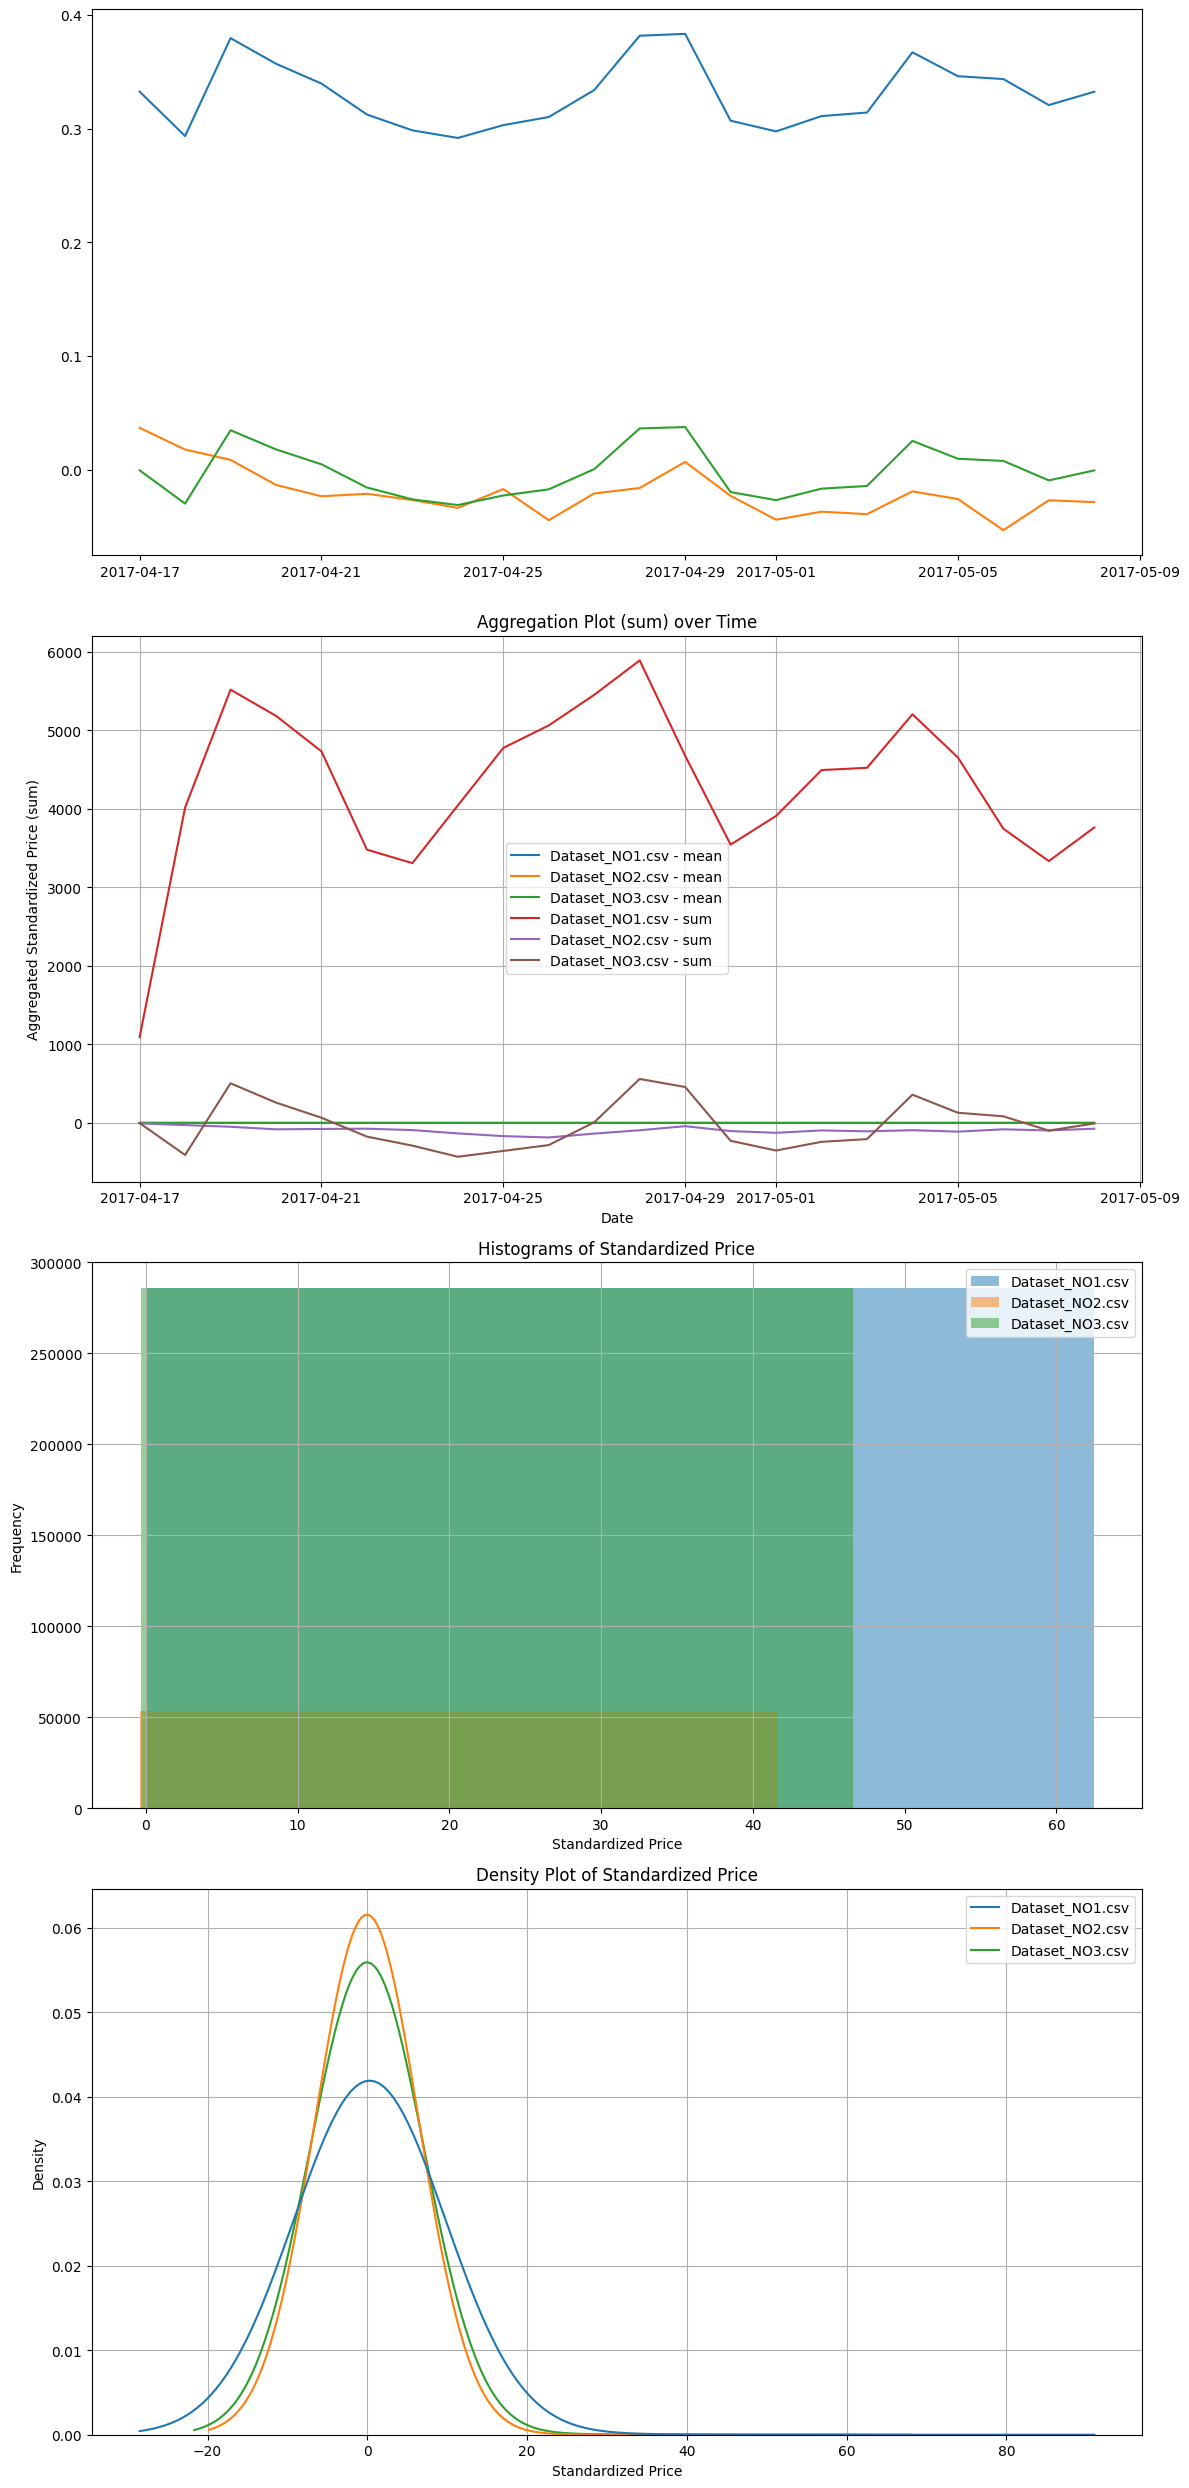

In [32]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# List of file paths for the three datasets
dataset_paths = [
    r"C:\Users\kevin\OneDrive\Desktop\code_fixed\Optimal-timing-for-bandwith-reservation-main\optimal_timing_for_bandwidth_reservation\datasets\Dataset_NO1.csv",
    r"C:\Users\kevin\OneDrive\Desktop\code_fixed\Optimal-timing-for-bandwith-reservation-main\optimal_timing_for_bandwidth_reservation\datasets\Dataset_NO2.csv",
    r"C:\Users\kevin\OneDrive\Desktop\code_fixed\Optimal-timing-for-bandwith-reservation-main\optimal_timing_for_bandwidth_reservation\datasets\Dataset_NO3.csv",
]

# Set the interval for plotting (e.g., daily, hourly)
plot_interval = '1D'  # 1-day interval

# Increase the figure size
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(12, 25))

# Initialize DataFrame to store standardized data with 'Date' index
standardized_data = pd.DataFrame()

# Standardize and store data for each dataset
for dataset_path in dataset_paths:
    df = pd.read_csv(dataset_path)
    scaler = StandardScaler()
    if 'Dataset_NO1' in dataset_path:
        df['Standardized_Price'] = df['Price']  # No scaling for Dataset_NO1
    else:
        df['Standardized_Price'] = scaler.fit_transform(df['Price'].values.reshape(-1, 1)).flatten()

    # Handle duplicates by aggregating
    df['Date'] = pd.to_datetime(df['Date'])
    df.set_index('Date', inplace=True)
    df = df.groupby(df.index).mean()

    standardized_data[os.path.basename(dataset_path)] = df['Standardized_Price']

    # Plot 1: Continuous Plot of Date vs Standardized Price
    df_resampled = df.resample(plot_interval).mean()
    ax1.plot(df_resampled.index, df_resampled['Standardized_Price'], label=os.path.basename(dataset_path))

# Plot 2: Aggregations (e.g., mean, sum) over time
aggregations = ['mean', 'sum']
for agg in aggregations:
    ax2.set_title(f"Aggregation Plot ({agg}) over Time")
    for dataset_path in dataset_paths:
        df_resampled = standardized_data[os.path.basename(dataset_path)].resample(plot_interval).agg({agg})
        ax2.plot(df_resampled.index, df_resampled[agg], label=f"{os.path.basename(dataset_path)} - {agg}")
    ax2.set_xlabel("Date")
    ax2.set_ylabel(f"Aggregated Standardized Price ({agg})")
    ax2.legend()
    ax2.grid(True)

# Plot 3: Histograms with fewer bins
ax3.set_title("Histograms of Standardized Price")
for dataset_path in dataset_paths:
    ax3.hist(standardized_data[os.path.basename(dataset_path)], bins=1, alpha=0.5, label=os.path.basename(dataset_path))
ax3.set_xlabel("Standardized Price")
ax3.set_ylabel("Frequency")
ax3.legend()
ax3.grid(True)

# Plot 4: Density Plot with adjusted bandwidth
ax4.set_title("Density Plot of Standardized Price")
sns.kdeplot(data=standardized_data, common_norm=False, ax=ax4, bw_adjust=100)  # Adjust the bandwidth here
ax4.set_xlabel("Standardized Price")
ax4.set_ylabel("Density")
ax4.grid(True)

plt.tight_layout()
plt.show()


In [50]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# List of file paths for the three datasets
dataset_paths = [
    r"C:\Users\kevin\OneDrive\Desktop\code_fixed\Optimal-timing-for-bandwith-reservation-main\optimal_timing_for_bandwidth_reservation\datasets\Dataset_NO1.csv",
    r"C:\Users\kevin\OneDrive\Desktop\code_fixed\Optimal-timing-for-bandwith-reservation-main\optimal_timing_for_bandwidth_reservation\datasets\Dataset_NO2.csv",
    r"C:\Users\kevin\OneDrive\Desktop\code_fixed\Optimal-timing-for-bandwith-reservation-main\optimal_timing_for_bandwidth_reservation\datasets\Dataset_NO3.csv",
]

# Set the interval for plotting (e.g., daily, hourly)
plot_interval = '1D'  # 1-day interval

# Initialize DataFrames to store standardized and original data with 'Date' index
standardized_data = pd.DataFrame()
original_data = pd.DataFrame()

# Iterate over each dataset
for dataset_path in dataset_paths:
    df = pd.read_csv(dataset_path)
    
    # Standardize data (mean=0, variance=1)
    scaler = StandardScaler()
    df['Standardized_Price'] = scaler.fit_transform(df['Price'].values.reshape(-1, 1)).flatten()

    # Handle duplicates by aggregating
    df['Date'] = pd.to_datetime(df['Date'])
    df_mean = df.groupby(df.index).mean()

    standardized_data[os.path.basename(dataset_path)] = df_mean['Standardized_Price']
    original_data[os.path.basename(dataset_path)] = df_mean['Price']

    # Calculate and print statistics for Original Price
    print(f"\nStatistics for Original Price in {os.path.basename(dataset_path)}:")
    print(f"Minimum: {df_mean['Price'].min()}")
    print(f"Maximum: {df_mean['Price'].max()}")
    print(f"Mean: {df_mean['Price'].mean()}")
    print(f"Variance: {df_mean['Price'].var()}")

    # Calculate and print statistics for Standardized Price
    print(f"\nStatistics for Standardized Price in {os.path.basename(dataset_path)}:")
    print(f"Minimum: {df_mean['Standardized_Price'].min()}")
    print(f"Maximum: {df_mean['Standardized_Price'].max()}")
    print(f"Mean: {df_mean['Standardized_Price'].mean()}")
    print(f"Variance: {df_mean['Standardized_Price'].var()}")

# Plot your graphs here...

plt.tight_layout()
plt.show()


C:\Users\kevin\AppData\Local\Temp\ipykernel_19748\2024104494.py:31: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_mean = df.groupby(df.index).mean()



Statistics for Original Price in Dataset_NO1.csv:
Minimum: 0.0033
Maximum: 62.5
Mean: 0.3332360117426213
Variance: 1.7805818846407262

Statistics for Standardized Price in Dataset_NO1.csv:
Minimum: -0.2472574004087812
Maximum: 46.5884047466562
Mean: 2.3378123861968833e-17
Variance: 1.0000025505324235


C:\Users\kevin\AppData\Local\Temp\ipykernel_19748\2024104494.py:31: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_mean = df.groupby(df.index).mean()



Statistics for Original Price in Dataset_NO2.csv:
Minimum: 0.0061
Maximum: 84.48
Mean: 0.8189307707725881
Variance: 4.039262041338027

Statistics for Standardized Price in Dataset_NO2.csv:
Minimum: -0.404436127268143
Maximum: 41.62681834746531
Mean: -1.332823532510446e-16
Variance: 1.000003781833584

Statistics for Original Price in Dataset_NO3.csv:
Minimum: 0.0133
Maximum: 62.6
Mean: 0.43320818550485113
Variance: 1.7806023214556008

Statistics for Standardized Price in Dataset_NO3.csv:
Minimum: -0.31468165594162845
Maximum: 46.5881582404585
Mean: -2.1239659818780988e-17
Variance: 1.000002550532424


C:\Users\kevin\AppData\Local\Temp\ipykernel_19748\2024104494.py:31: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_mean = df.groupby(df.index).mean()


<Figure size 640x480 with 0 Axes>

C:\Users\kevin\AppData\Local\Temp\ipykernel_19748\782269792.py:35: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_mean = df.groupby(df.index).mean()
C:\Users\kevin\AppData\Local\Temp\ipykernel_19748\782269792.py:35: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_mean = df.groupby(df.index).mean()
C:\Users\kevin\AppData\Local\Temp\ipykernel_19748\782269792.py:35: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_mea

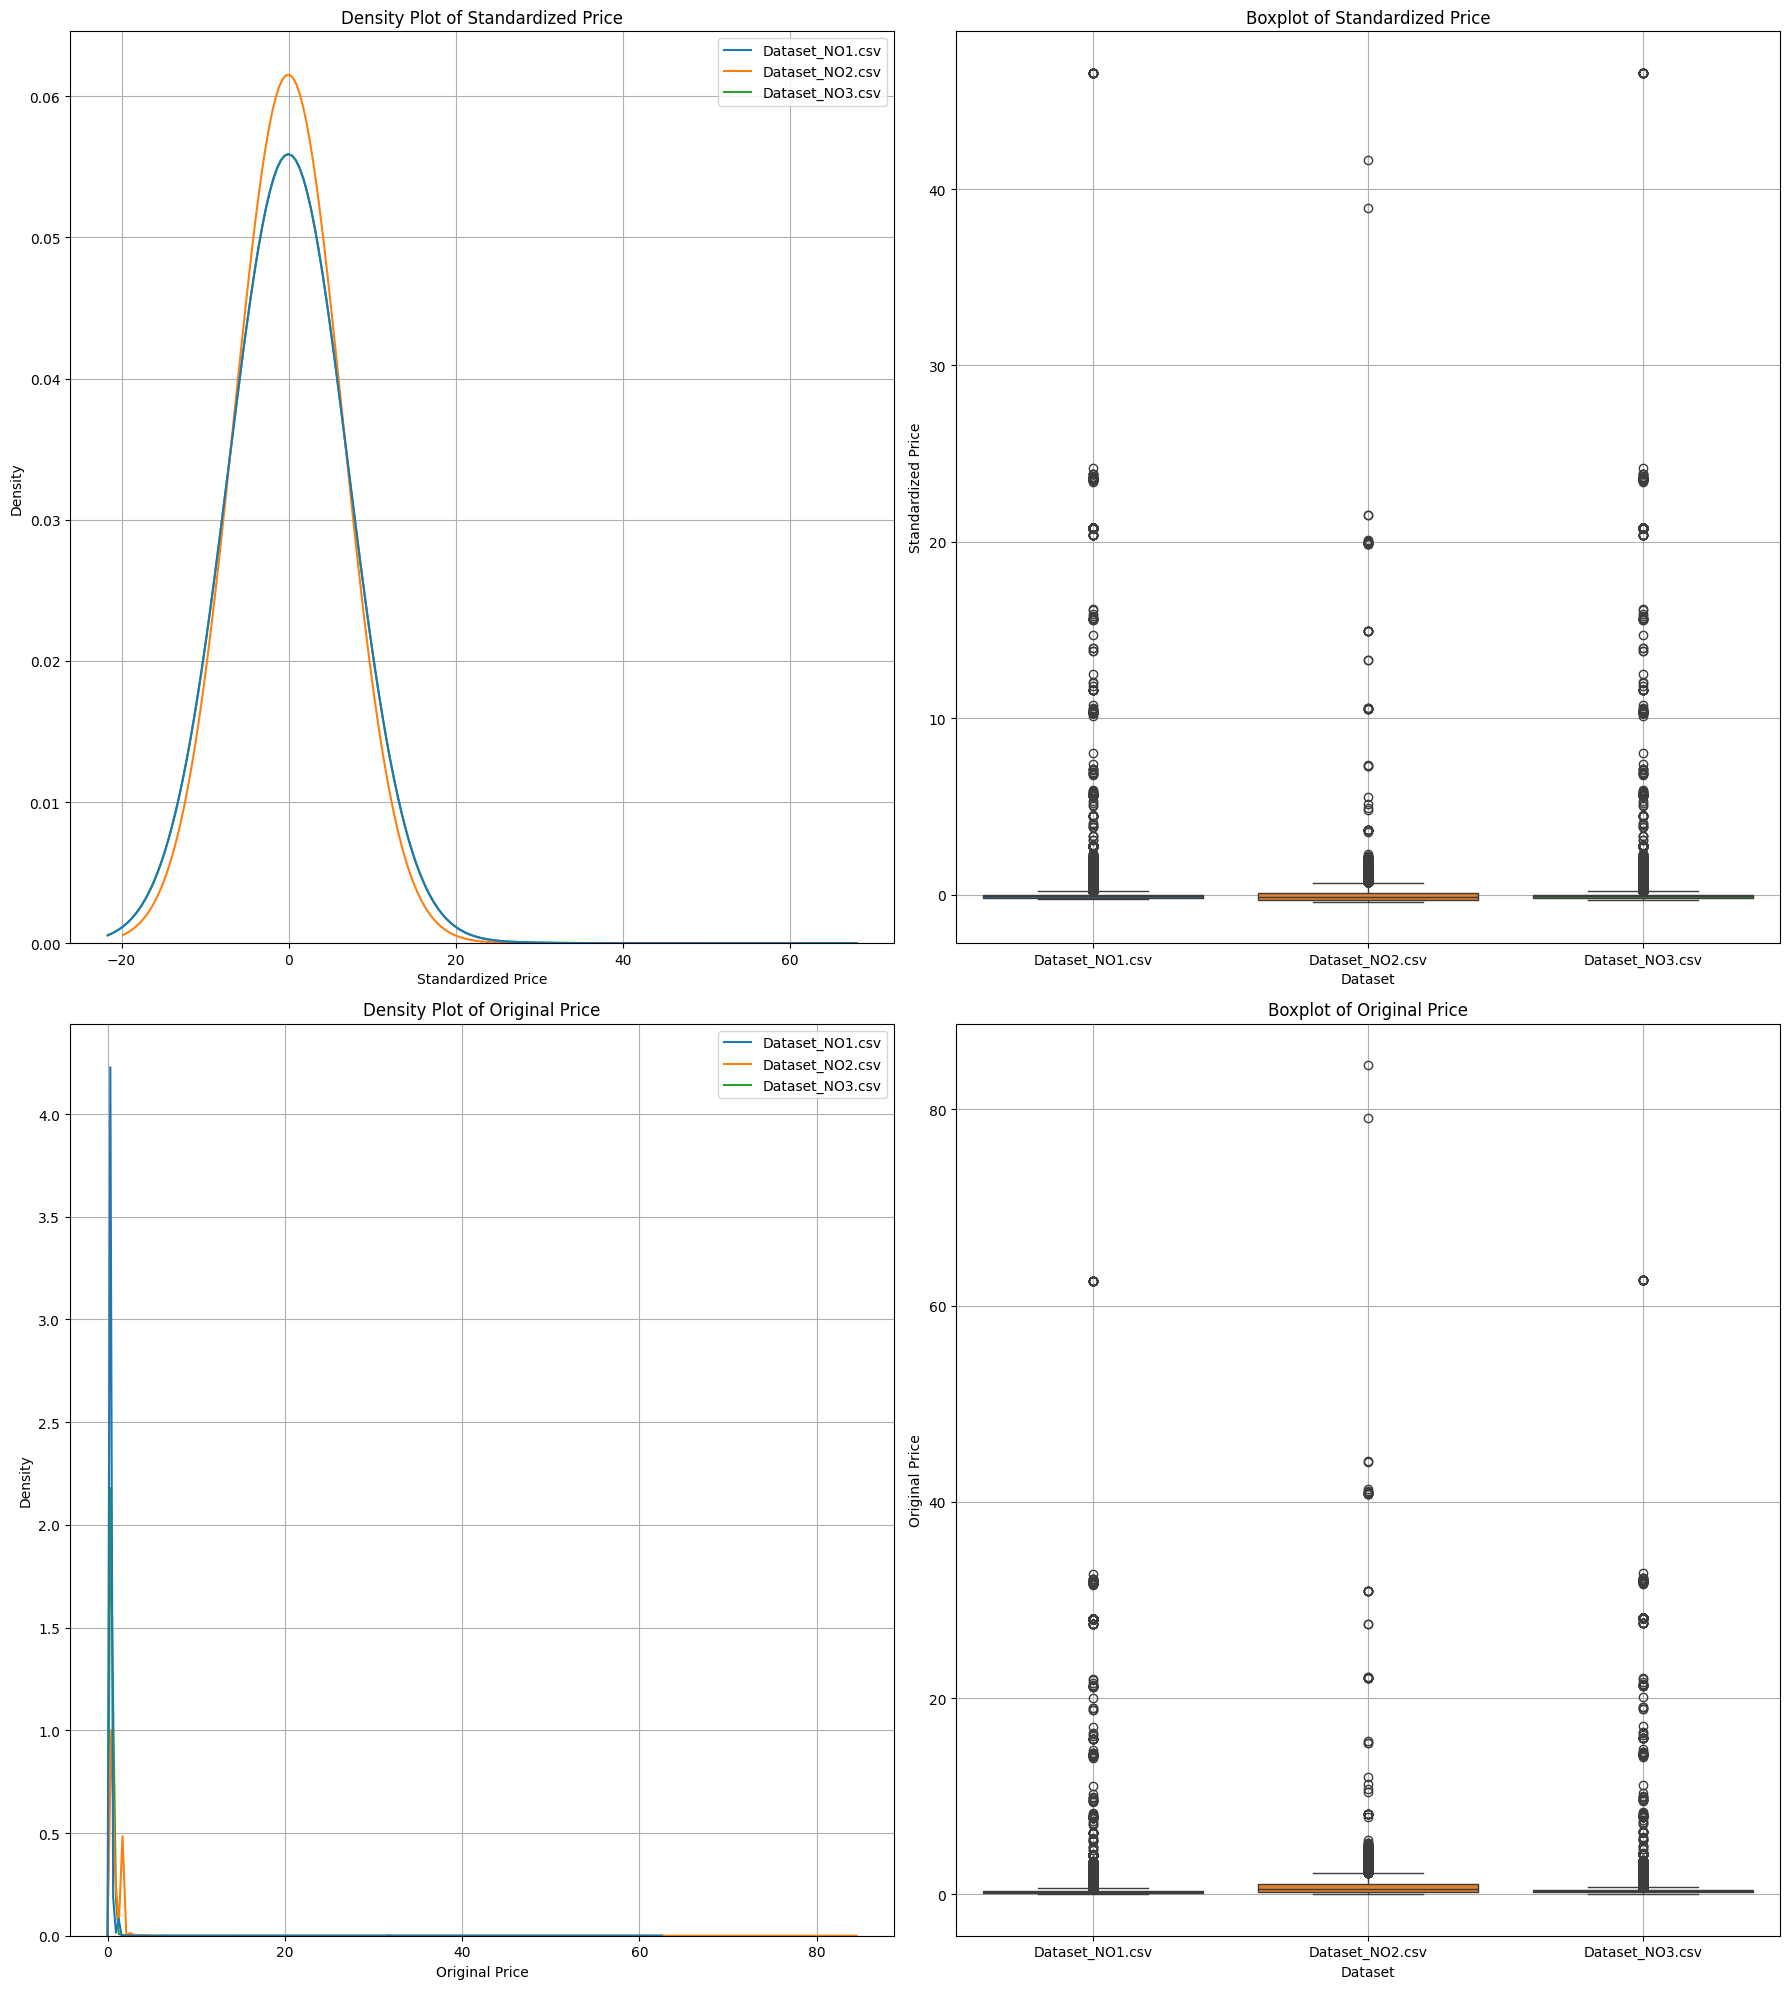

In [52]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# List of file paths for the three datasets
dataset_paths = [
    r"C:\Users\kevin\OneDrive\Desktop\code_fixed\Optimal-timing-for-bandwith-reservation-main\optimal_timing_for_bandwidth_reservation\datasets\Dataset_NO1.csv",
    r"C:\Users\kevin\OneDrive\Desktop\code_fixed\Optimal-timing-for-bandwith-reservation-main\optimal_timing_for_bandwidth_reservation\datasets\Dataset_NO2.csv",
    r"C:\Users\kevin\OneDrive\Desktop\code_fixed\Optimal-timing-for-bandwith-reservation-main\optimal_timing_for_bandwidth_reservation\datasets\Dataset_NO3.csv",
]

# Set the interval for plotting (e.g., daily, hourly)
plot_interval = '1D'  # 1-day interval

# Increase the figure size
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(18, 20))

# Initialize DataFrames to store standardized and original data with 'Date' index
standardized_data = pd.DataFrame()
original_data = pd.DataFrame()

# Iterate over each dataset
for dataset_path in dataset_paths:
    df = pd.read_csv(dataset_path)
    
    # Standardize data (mean=0, variance=1)
    scaler = StandardScaler()
    df['Standardized_Price'] = scaler.fit_transform(df['Price'].values.reshape(-1, 1)).flatten()

    # Handle duplicates by aggregating
    df['Date'] = pd.to_datetime(df['Date'])
    df.set_index('Date', inplace=True)
    df_mean = df.groupby(df.index).mean()

    standardized_data[os.path.basename(dataset_path)] = df_mean['Standardized_Price']
    original_data[os.path.basename(dataset_path)] = df_mean['Price']

# Plot Density Plot with adjusted bandwidth for Standardized Price
ax1.set_title("Density Plot of Standardized Price")
sns.kdeplot(data=standardized_data, common_norm=False, ax=ax1, bw_adjust=100)  # Adjust the bandwidth here
ax1.set_xlabel("Standardized Price")
ax1.set_ylabel("Density")
ax1.grid(True)

# Plot Boxplot for Standardized Price
ax2.set_title("Boxplot of Standardized Price")
sns.boxplot(data=standardized_data, ax=ax2)
ax2.set_xlabel("Dataset")
ax2.set_ylabel("Standardized Price")
ax2.grid(True)

# Plot Density Plot with adjusted bandwidth for Original Price
ax3.set_title("Density Plot of Original Price")
sns.kdeplot(data=original_data, common_norm=False, ax=ax3, bw_adjust=0.1)  # Adjust the bandwidth here
ax3.set_xlabel("Original Price")
ax3.set_ylabel("Density")
ax3.grid(True)

# Plot Boxplot for Original Price
ax4.set_title("Boxplot of Original Price")
sns.boxplot(data=original_data, ax=ax4)
ax4.set_xlabel("Dataset")
ax4.set_ylabel("Original Price")
ax4.grid(True)

plt.tight_layout()
plt.show()
